In [ ]:
import numpy as np
import pandas as pd
import math
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

print('Libraries Imported')
df = pd.DataFrame(pd.read_excel('/content/Spotify_data.xlsx'))

Libraries Imported


In [ ]:
df.head()

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,None,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,None,Both,Satisfied
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,None,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,None,None,None,None,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,None,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok


In [ ]:
#Wanted to check if there are missing values in this dataset. and there seems to be none.
missing_values = df.isnull().sum()
print(missing_values)

Age                            0
Gender                         0
spotify_usage_period           0
spotify_listening_device       0
spotify_subscription_plan      0
premium_sub_willingness        0
preffered_premium_plan         0
preferred_listening_content    0
fav_music_genre                0
music_time_slot                0
music_Influencial_mood         0
music_lis_frequency            0
music_expl_method              0
music_recc_rating              0
pod_lis_frequency              0
fav_pod_genre                  0
preffered_pod_format           0
pod_host_preference            0
preffered_pod_duration         0
pod_variety_satisfaction       0
dtype: int64


In [ ]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'Age': ['20-35' '12-20' '35-60' '6-12' '60+']
Unique values in 'Gender': ['Female' 'Male' 'Others']
Unique values in 'spotify_usage_period': ['More than 2 years' '6 months to 1 year' '1 year to 2 years'
 'Less than 6 months']
Unique values in 'spotify_listening_device': ['Smart speakers or voice assistants' 'Computer or laptop'
 'Smartphone, Smart speakers or voice assistants' 'Smartphone'
 'Smartphone, Computer or laptop'
 'Smartphone, Computer or laptop, Smart speakers or voice assistants'
 'Smartphone, Wearable devices'
 'Smartphone, Computer or laptop, Wearable devices'
 'Computer or laptop, Wearable devices'
 'Smartphone, Computer or laptop, Smart speakers or voice assistants, Wearable devices'
 'Wearable devices'
 'Smartphone, Smart speakers or voice assistants, Wearable devices'
 'Computer or laptop, Smart speakers or voice assistants'
 'Computer or laptop, Smart speakers or voice assistants, Wearable devices'
 'Smart speakers or voice assistants, Wearable devic

In [ ]:
subscription_plan_mapping = {
    'Free (ad-supported)': 0,
    'Premium (paid subscription)': 1
}
df['premium_subscription'] = df['spotify_subscription_plan'].map(subscription_plan_mapping)
df = df.drop('spotify_subscription_plan', axis=1)


sub_willingness_mapping = {
    'Yes': 1,
    'No': 0
}
df['premium_sub_willingness'] = df['premium_sub_willingness'].map(sub_willingness_mapping)

pod_lis_frequency_mapping = {
    'Never': 0,
    'Rarely': 1,
    'Once a week': 2,
    'Several times a week': 3,
    'Daily': 4
}

df['pod_lis_frequency'] = df['pod_lis_frequency'].map(pod_lis_frequency_mapping)

pod_variety_satisfaction_mapping = {
    'Very Dissatisfied': -2,
    'Dissatisfied': -1,
    'Ok': 0,
    'Satisfied': 1,
    'Very Satisfied': 2
}
df['pod_variety_satisfaction'] = df['pod_variety_satisfaction'].map(pod_variety_satisfaction_mapping)

def categorize_device(device_string):
    if ', ' in device_string:
        return 'multi-device'
    else:
        return device_string

df['spotify_listening_device'] = df['spotify_listening_device'].apply(categorize_device)


In [ ]:
premium_subscribers = df[df['premium_subscription'] == 1]
willingness_to_continue = premium_subscribers['premium_sub_willingness'].value_counts()
print(willingness_to_continue)

1    72
0    24
Name: premium_sub_willingness, dtype: int64


In [ ]:
df.columns

Index(['Age', 'Gender', 'spotify_usage_period', 'spotify_listening_device',
       'premium_sub_willingness', 'preffered_premium_plan',
       'preferred_listening_content', 'fav_music_genre', 'music_time_slot',
       'music_Influencial_mood', 'music_lis_frequency', 'music_expl_method',
       'music_recc_rating', 'pod_lis_frequency', 'fav_pod_genre',
       'preffered_pod_format', 'pod_host_preference', 'preffered_pod_duration',
       'pod_variety_satisfaction', 'premium_subscription'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_cols = df.select_dtypes(include=['object', 'category']).columns
binary_cols = [col for col in df.columns if df[col].nunique() == 2]

encoder = OneHotEncoder(sparse_output=False)

encoded_data = encoder.fit_transform(df[categorical_cols])

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

df = pd.concat([df.drop(categorical_cols, axis=1), encoded_df], axis=1)

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.difference(encoded_df.columns.union(binary_cols))

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [ ]:
# Check for NaN values
print(df.isna().sum())

# View the first few rows of the DataFrame
print(df.head(10))

premium_sub_willingness                   0
music_recc_rating                         0
pod_lis_frequency                         0
pod_variety_satisfaction                  0
premium_subscription                      0
                                         ..
pod_host_preference_unknown Podcasters    0
preffered_pod_duration_Both               0
preffered_pod_duration_Longer             0
preffered_pod_duration_None               0
preffered_pod_duration_Shorter            0
Length: 146, dtype: int64
   premium_sub_willingness  music_recc_rating  pod_lis_frequency  \
0                        1          -0.514859           2.373813   
1                        1          -1.536717           1.481273   
2                        1           0.506999           0.588733   
3                        0           0.506999          -1.196347   
4                        0           0.506999          -0.303807   
5                        0          -0.514859          -1.196347   
6             

In [ ]:
df.columns

Index(['premium_sub_willingness', 'music_recc_rating', 'pod_lis_frequency',
       'pod_variety_satisfaction', 'premium_subscription', 'Age_12-20',
       'Age_20-35', 'Age_35-60', 'Age_6-12', 'Age_60+',
       ...
       'preffered_pod_format_None', 'preffered_pod_format_Story telling',
       'pod_host_preference_Both', 'pod_host_preference_None',
       'pod_host_preference_Well known individuals',
       'pod_host_preference_unknown Podcasters', 'preffered_pod_duration_Both',
       'preffered_pod_duration_Longer', 'preffered_pod_duration_None',
       'preffered_pod_duration_Shorter'],
      dtype='object', length=146)

In [ ]:
categorical_cols = premium_subscribers.select_dtypes(include=['object', 'category']).columns
binary_cols = [col for col in premium_subscribers.columns if premium_subscribers[col].nunique() == 2]

encoder = OneHotEncoder(sparse_output=False)

encoded_data_premium_subscribers = encoder.fit_transform(premium_subscribers[categorical_cols])

encoded_premium_subscribers = pd.DataFrame(encoded_data_premium_subscribers, columns=encoder.get_feature_names_out(categorical_cols))

premium_subscribers = pd.concat([premium_subscribers.drop(categorical_cols, axis=1), encoded_premium_subscribers], axis=1)

numerical_cols = premium_subscribers.select_dtypes(include=['int64', 'float64']).columns.difference(encoded_premium_subscribers.columns.union(binary_cols))

scaler = StandardScaler()
premium_subscribers[numerical_cols] = scaler.fit_transform(premium_subscribers[numerical_cols])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV


# Selecting features - make sure to exclude the target variable
feature_columns = [col for col in df.columns if col != 'premium_sub_willingness']
X = df[feature_columns]

y = df['premium_sub_willingness']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_reg = LogisticRegression(max_iter=500)

log_reg.fit(X_train, y_train)

log_pred = log_reg.predict(X_test)

log_acc = accuracy_score(y_test, log_pred)

cm_log = confusion_matrix(y_test, log_pred)
tn_log, fp_log, fn_log, tp_log = cm_log.ravel()

log_TPR = tp_log / (tp_log + fn_log)
log_FPR = fp_log / (fp_log + tn_log)

log_PRE = precision_score(y_test, log_pred)

log_acc

0.7884615384615384

In [ ]:
sub_willingness_mapping = {
    'Yes': 1,
    'No': 0
}
premium_subscribers['premium_sub_willingness'] = premium_subscribers['premium_sub_willingness'].map(sub_willingness_mapping)

premium_subscribers

,premium_sub_willingness,music_recc_rating,pod_lis_frequency,pod_variety_satisfaction,premium_subscription,Age_12-20,Age_20-35,Age_35-60,Age_6-12,Gender_Female,...,preffered_pod_format_None,preffered_pod_format_Story telling,pod_host_preference_Both,pod_host_preference_None,pod_host_preference_Well known individuals,pod_host_preference_unknown Podcasters,preffered_pod_duration_Both,preffered_pod_duration_Longer,preffered_pod_duration_None,preffered_pod_duration_Shorter
23,NaN,-2.023501,-0.674624,1.637241,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
24,NaN,-0.137520,-0.674624,-0.726295,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
26,NaN,0.805471,1.230197,0.455473,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
49,NaN,0.805471,-0.674624,1.637241,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
59,NaN,1.748462,-1.627035,0.455473,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
92,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
93,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
94,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
sub_willingness_mapping = {
    'Yes': 1,
    'No': 0
}
premium_subscribers['premium_sub_willingness'] = premium_subscribers['premium_sub_willingness'].map(sub_willingness_mapping)

from sklearn.cluster import KMeans

features_for_clustering  = [col for col in premium_subscribers.columns]
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters
clusters = kmeans.fit_predict(features_for_clustering)

# Adding cluster information to the DataFrame
premium_subscribers['Cluster'] = clusters

# Visualize the clusters
sns.scatterplot(data=premium_subscribers, x='feature_1', y='feature_2', hue='Cluster', palette='viridis')
plt.title('Clusters within Premium Subscribers')
plt.show()

ValueError: ignored

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

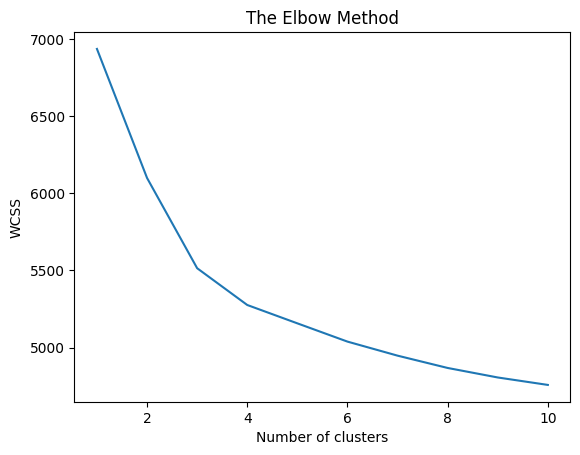

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

kmeans = KMeans(n_clusters= 3, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(df)

df['Cluster'] = clusters

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
K = range(2, 15)  # silhouette score is not defined for k=1

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    silhouette_avg = silhouette_score(df, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    print(f"Silhouette Score for k={k}: {silhouette_avg}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=2: 0.17652628659595815


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=3: 0.14179677657378628


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=4: 0.11136395088749185


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=5: 0.09371363227188824


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=6: 0.06830426233227006


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=7: 0.059127084988471745


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=8: 0.058176885589957206


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=9: 0.050830596970557564


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=10: 0.051319313735992765


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=11: 0.05322360805916562


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=12: 0.06803039792337995


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=13: 0.041391443504054826


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=14: 0.041362372984697235


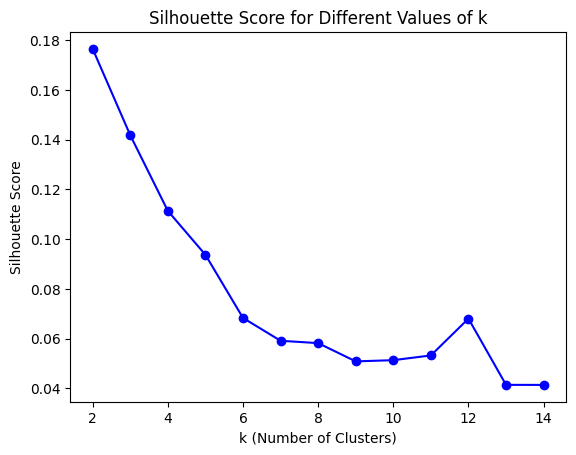

In [ ]:
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('k (Number of Clusters)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Values of k')
plt.show()

         premium_sub_willingness  music_recc_rating  pod_lis_frequency  \
Cluster                                                                  
0                       0.278481           0.381961           0.148112   
1                       0.218310           0.082424          -1.014067   
2                       0.631206          -0.725028           0.772305   

         pod_variety_satisfaction  premium_subscription  Age_12-20  Age_20-35  \
Cluster                                                                         
0                        0.308786              0.122363   0.067511   0.898734   
1                       -0.603779              0.070423   0.070423   0.915493   
2                        0.089038              0.404255   0.319149   0.560284   

         Age_35-60  Age_6-12   Age_60+  ...  preffered_pod_format_None  \
Cluster                                 ...                              
0         0.029536  0.000000  0.004219  ...                   0.042194   
1

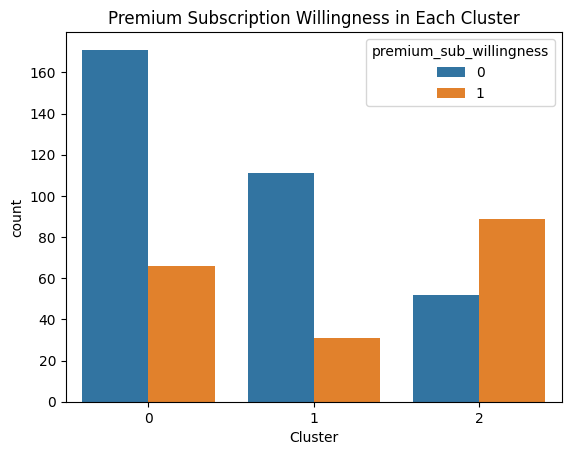

In [ ]:
# Checking the mean values of features for each cluster
cluster_analysis = df.groupby('Cluster').mean()
print(cluster_analysis)

# Visualizing the distribution of 'premium_sub_willingness' in each cluster
sns.countplot(x='Cluster', hue='premium_sub_willingness', data=df)
plt.title('Premium Subscription Willingness in Each Cluster')
plt.show()

In [ ]:
from sklearn.decomposition import PCA

# Applying PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Add the cluster labels to the DataFrame
pca_df['Cluster'] = clusters  # Assuming 'clusters' contains your cluster labels

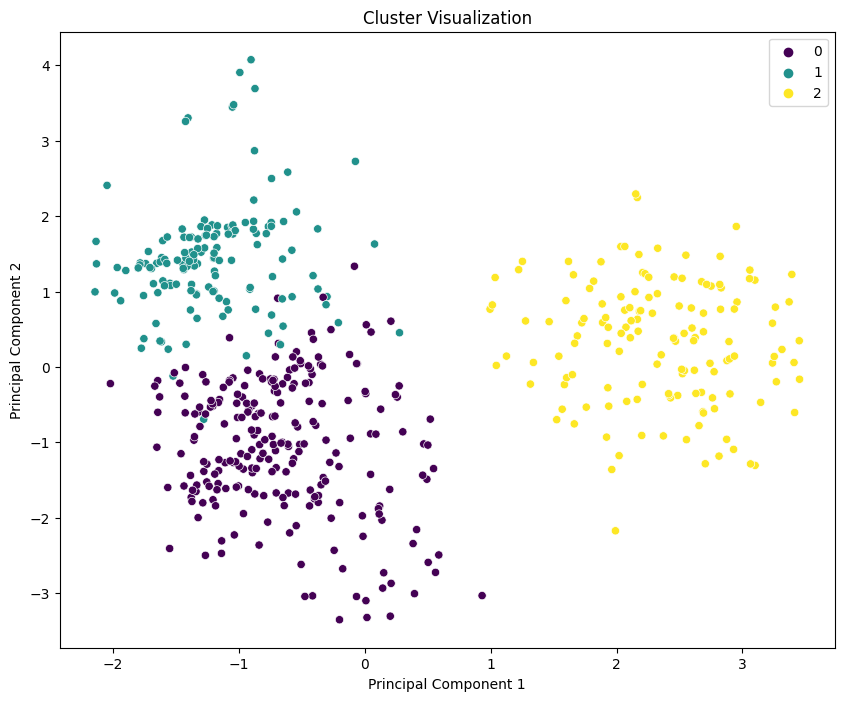

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis')

plt.title('Cluster Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

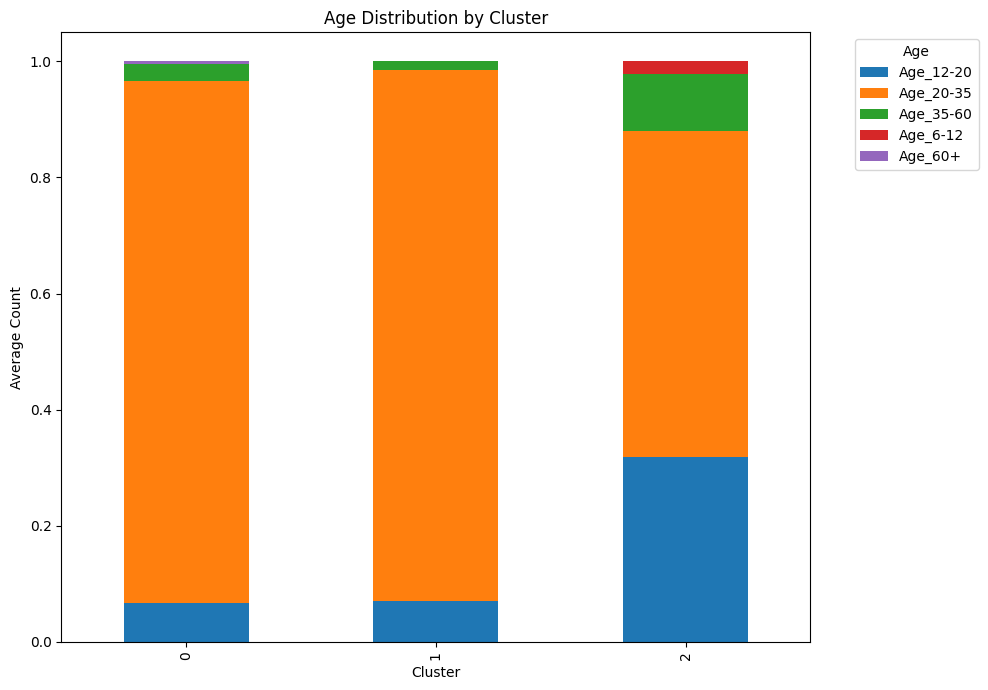

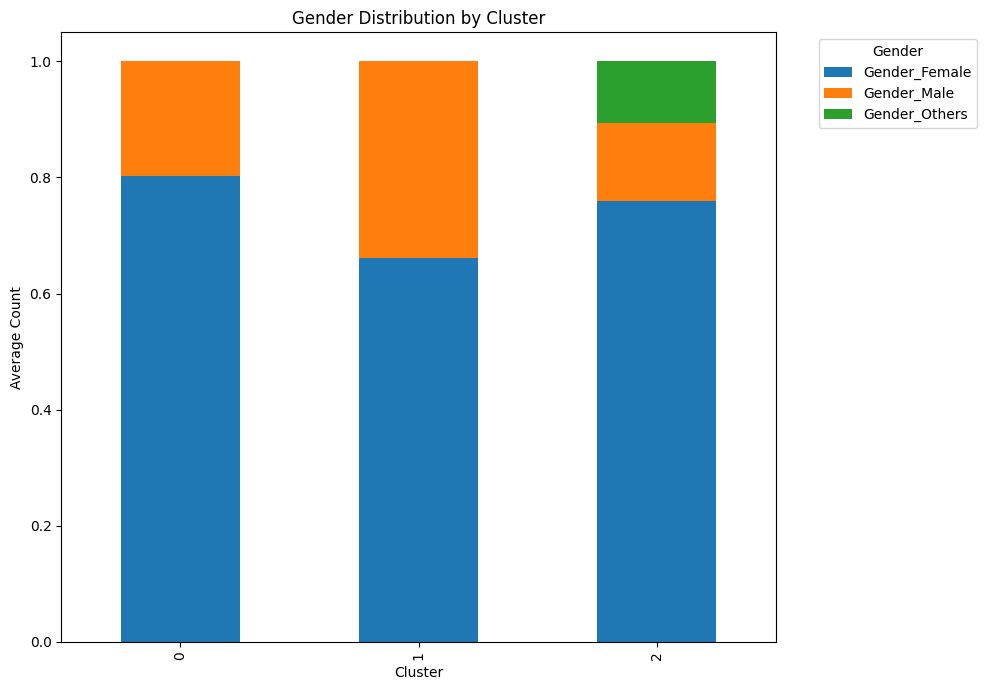

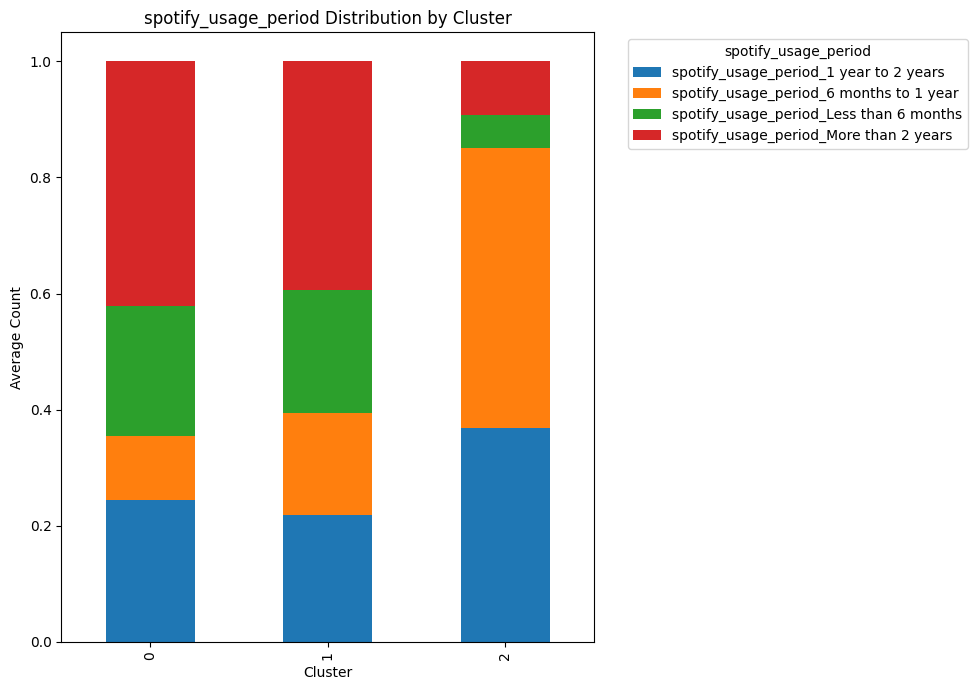

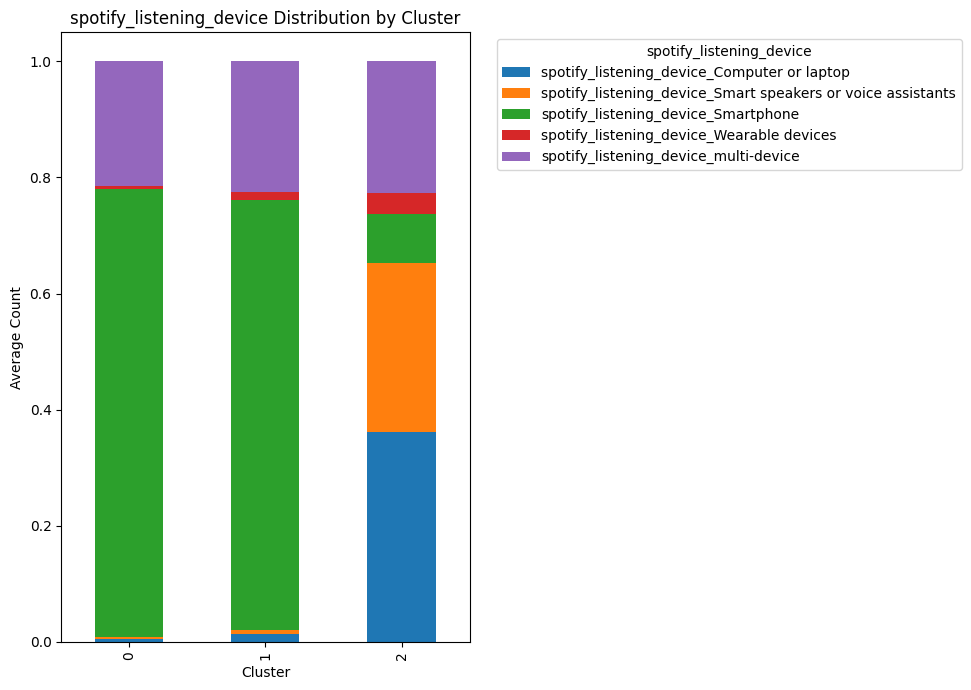

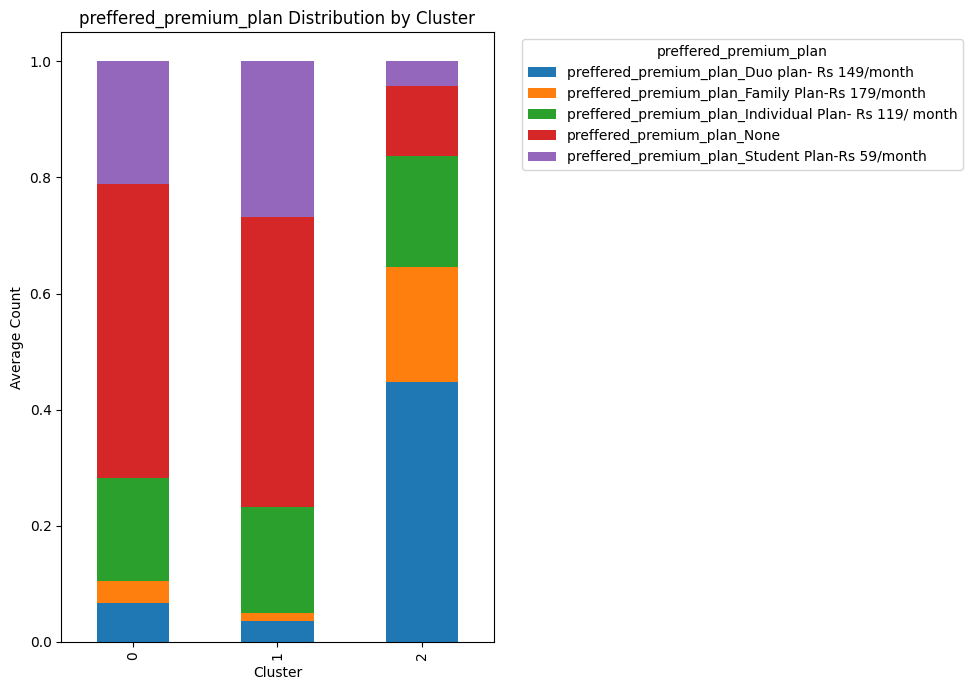

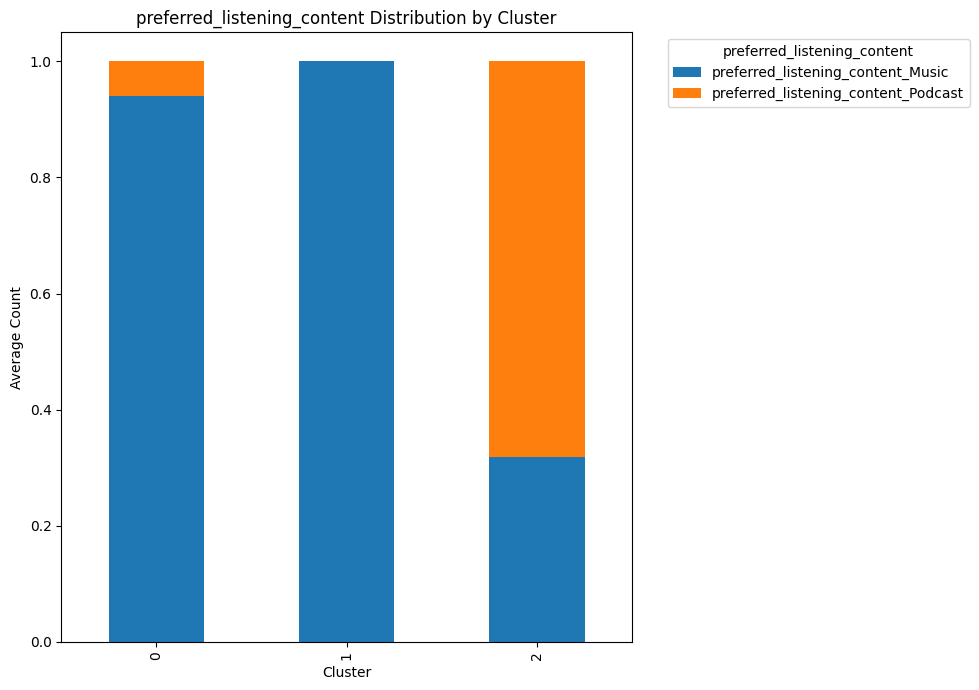

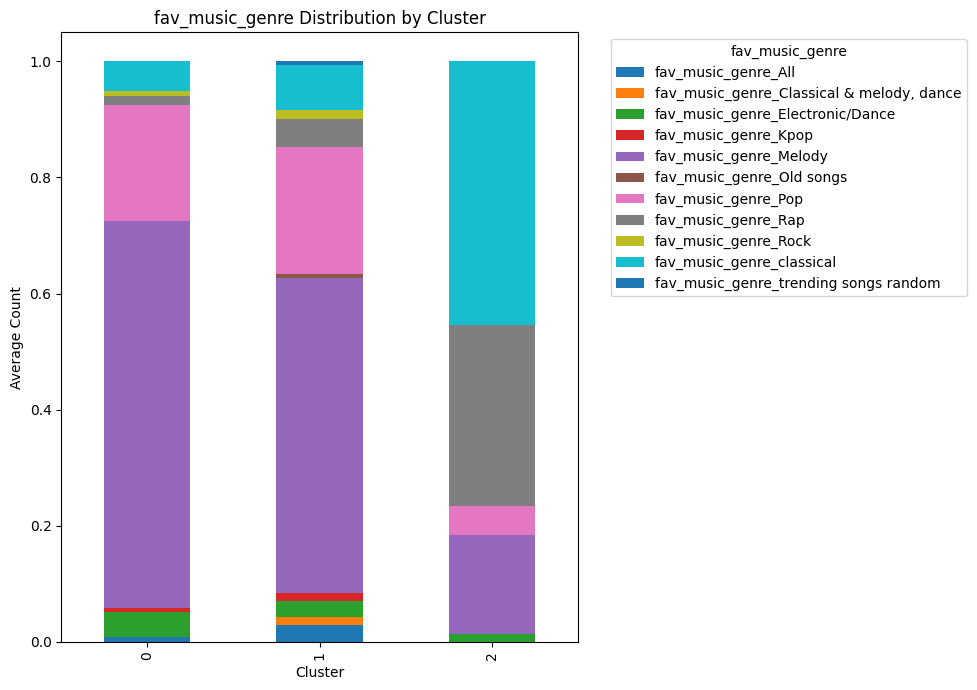

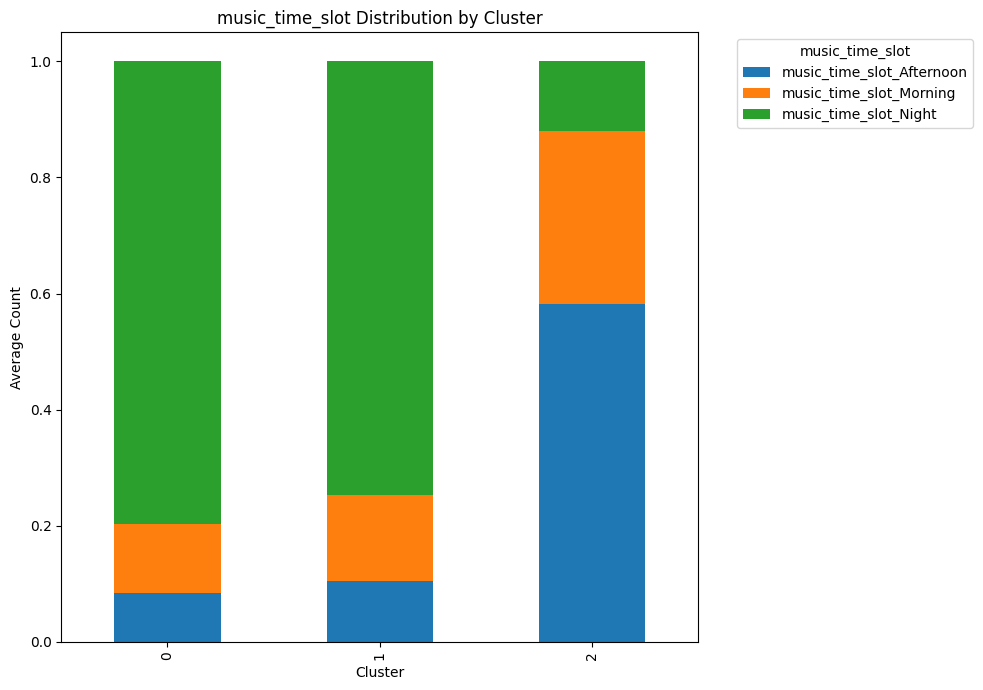

<ipython-input-22-121150ffabb6>:15: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


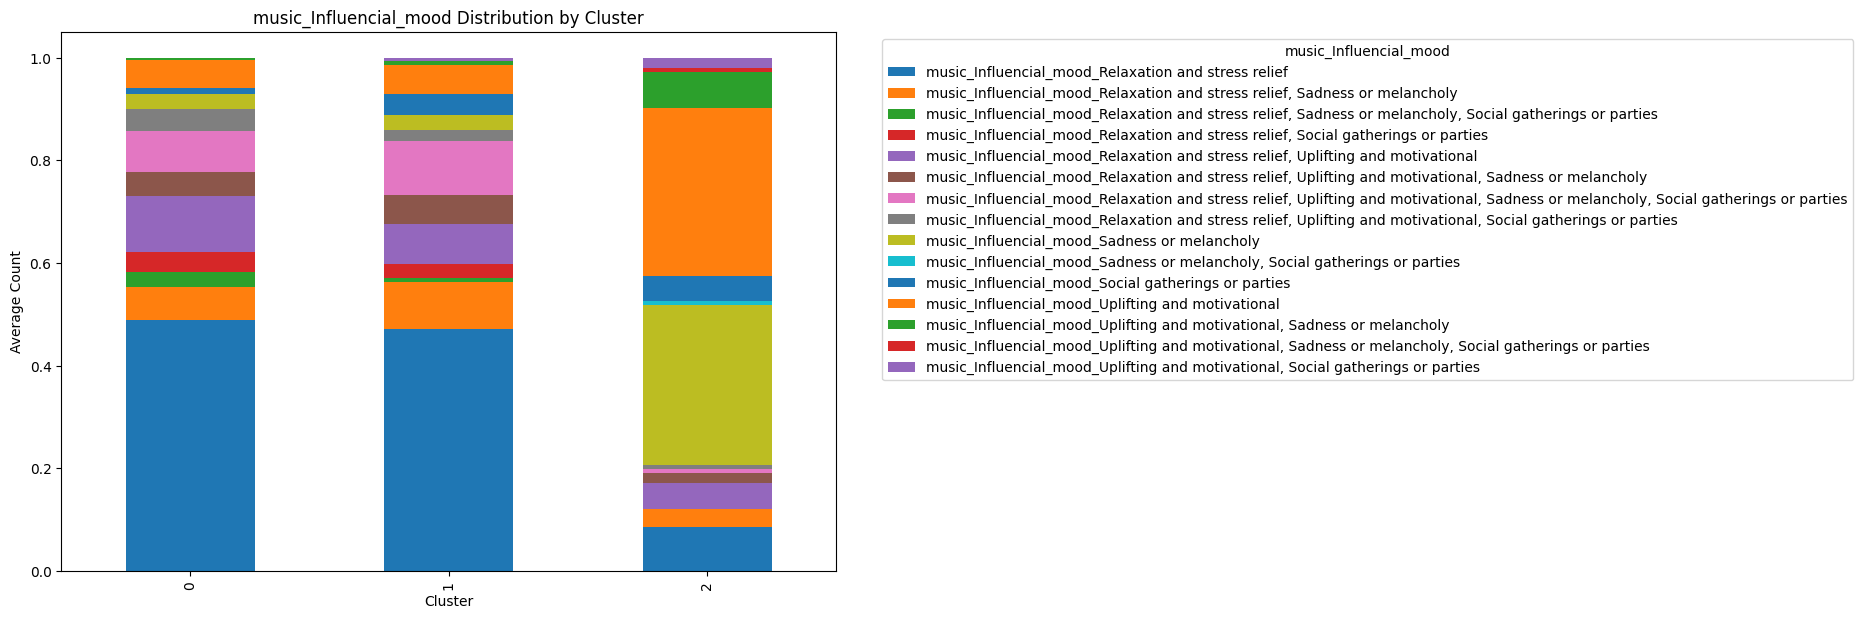

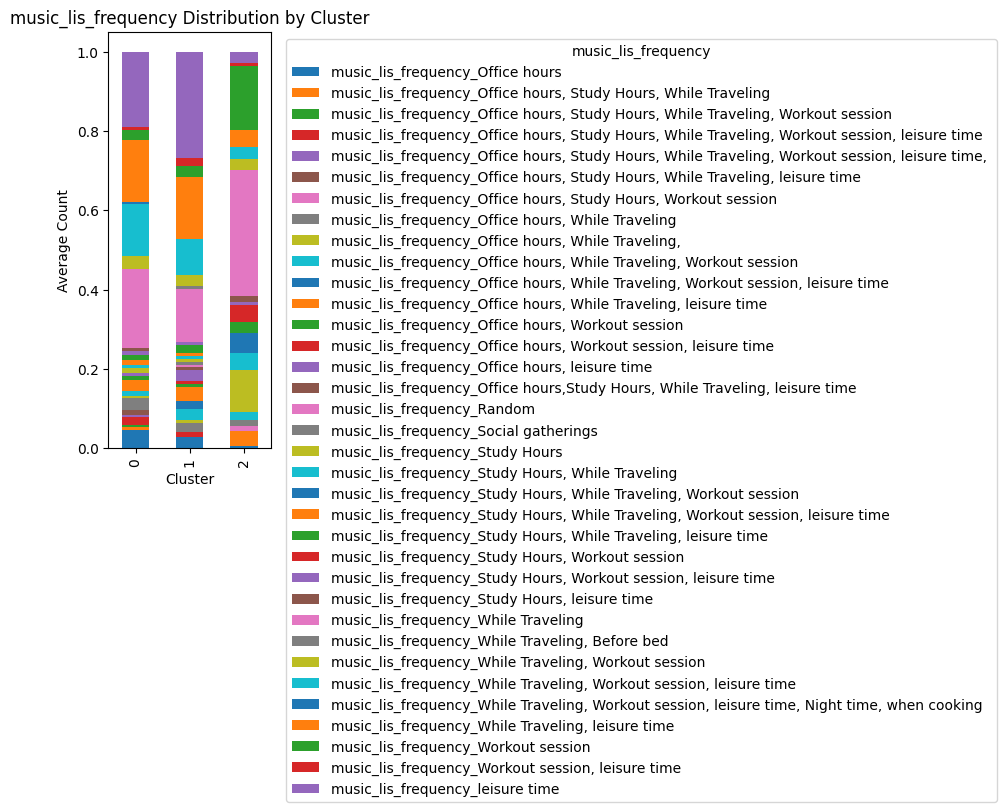

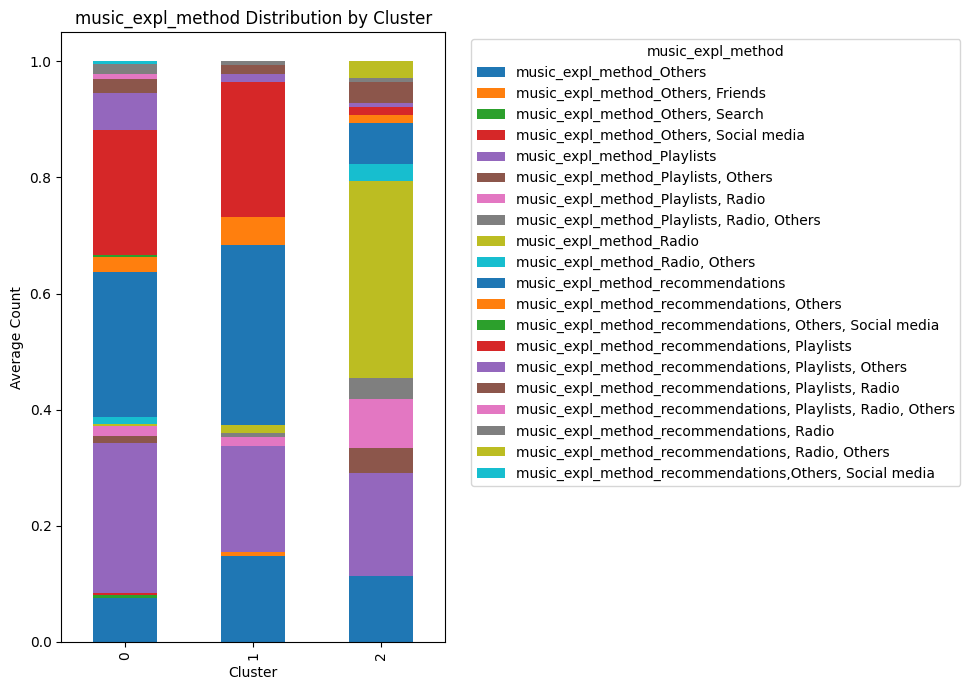

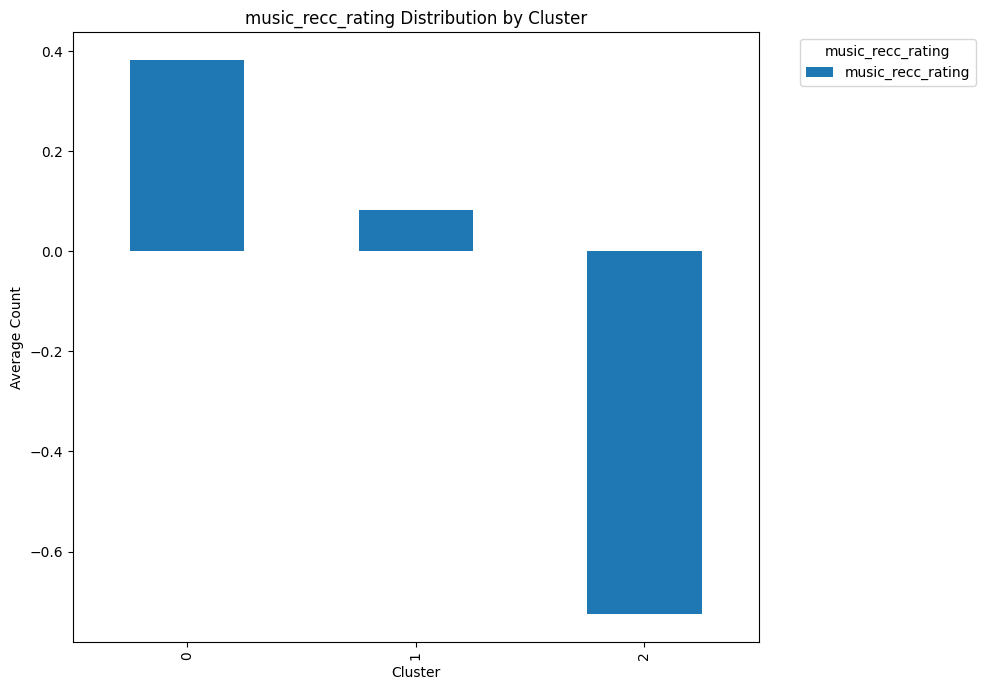

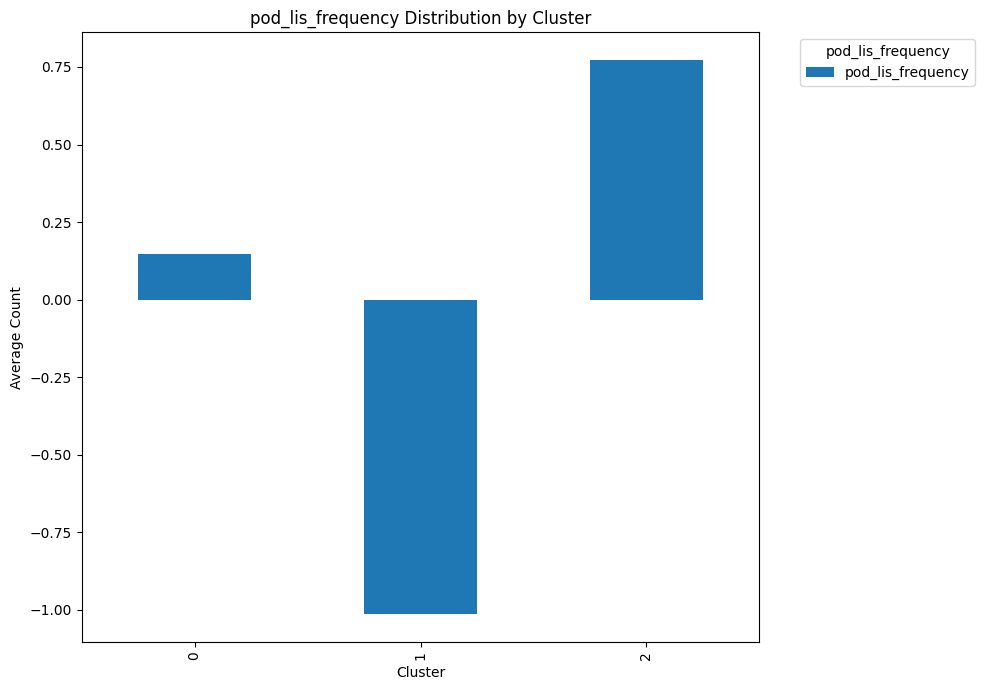

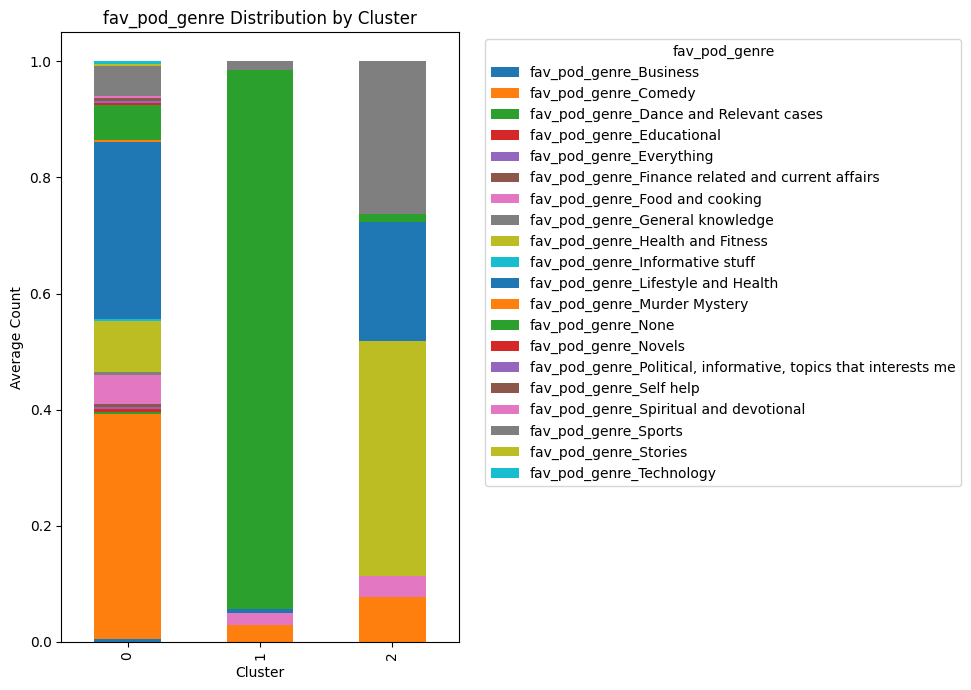

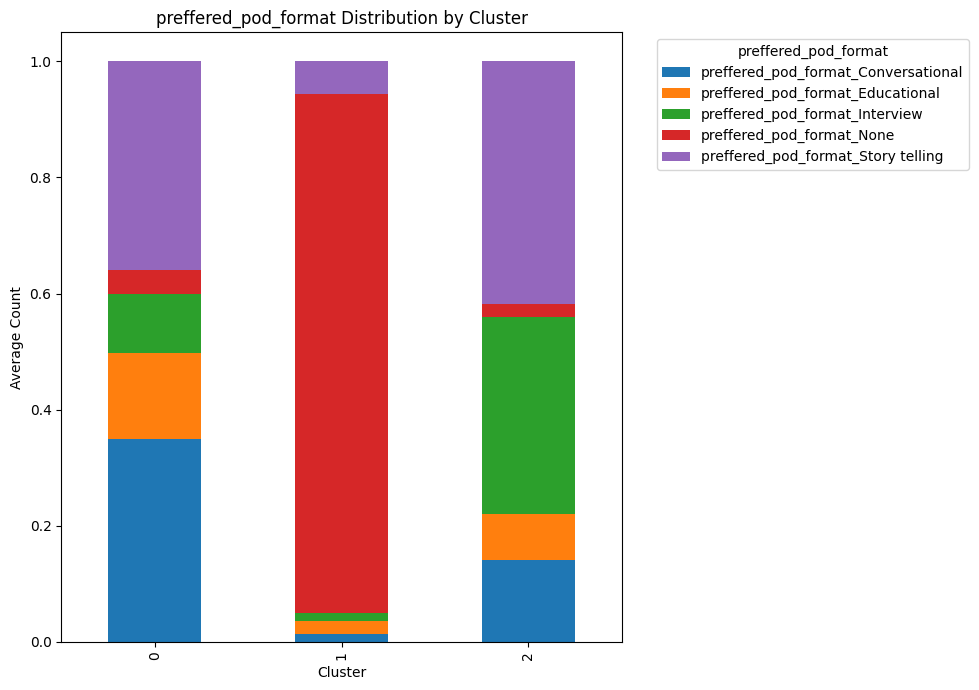

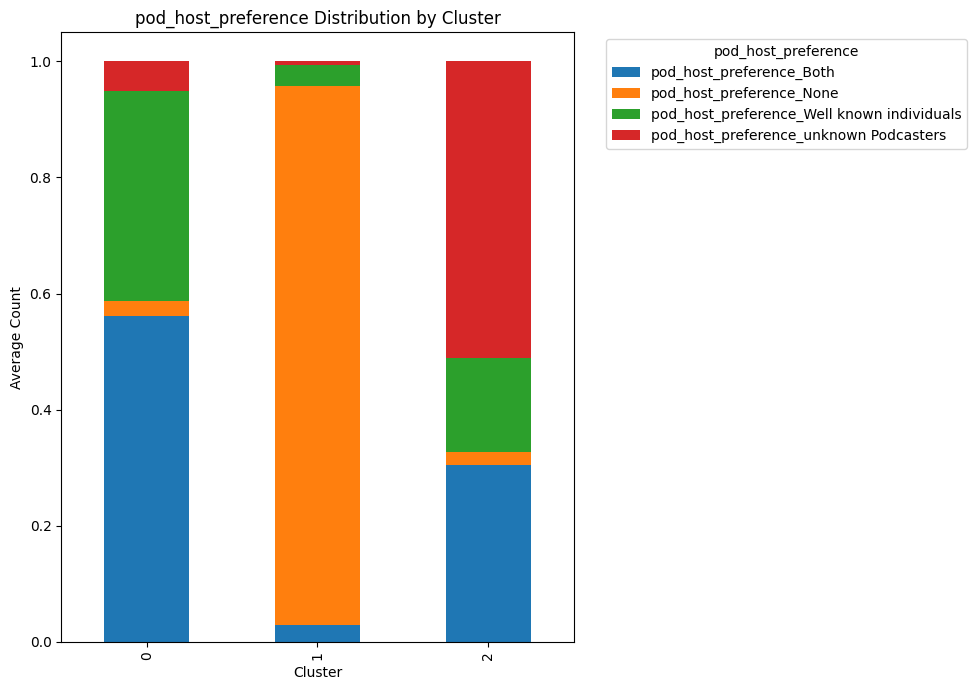

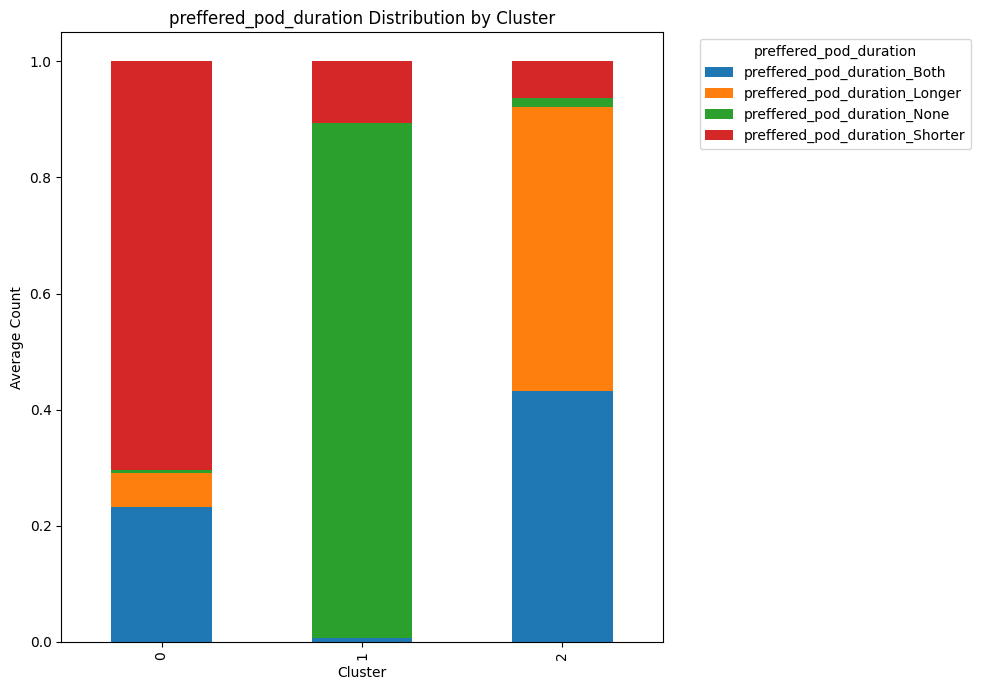

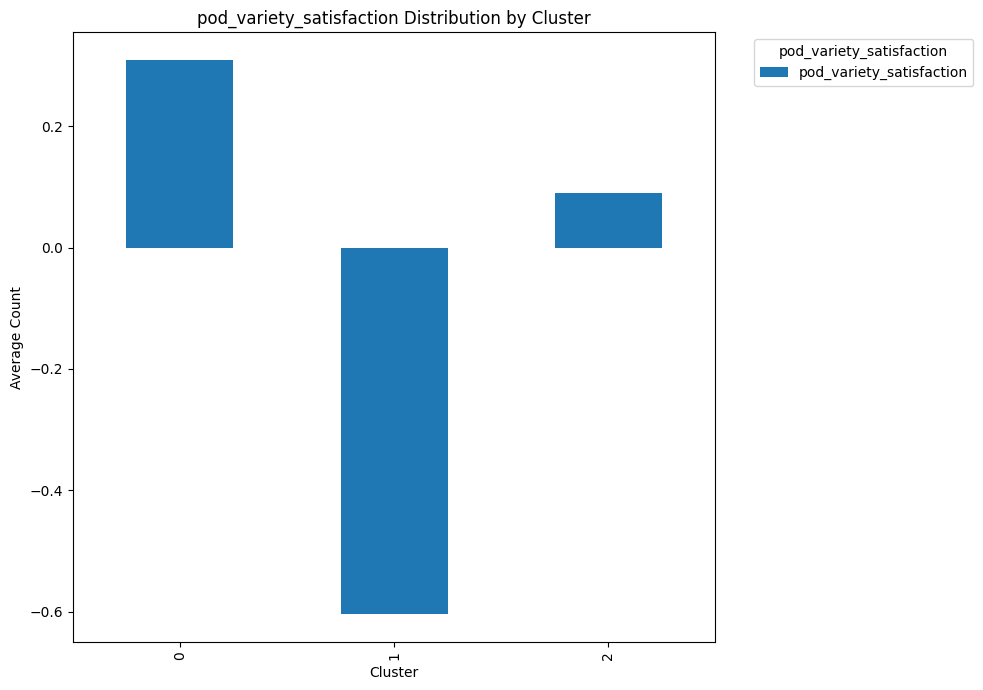

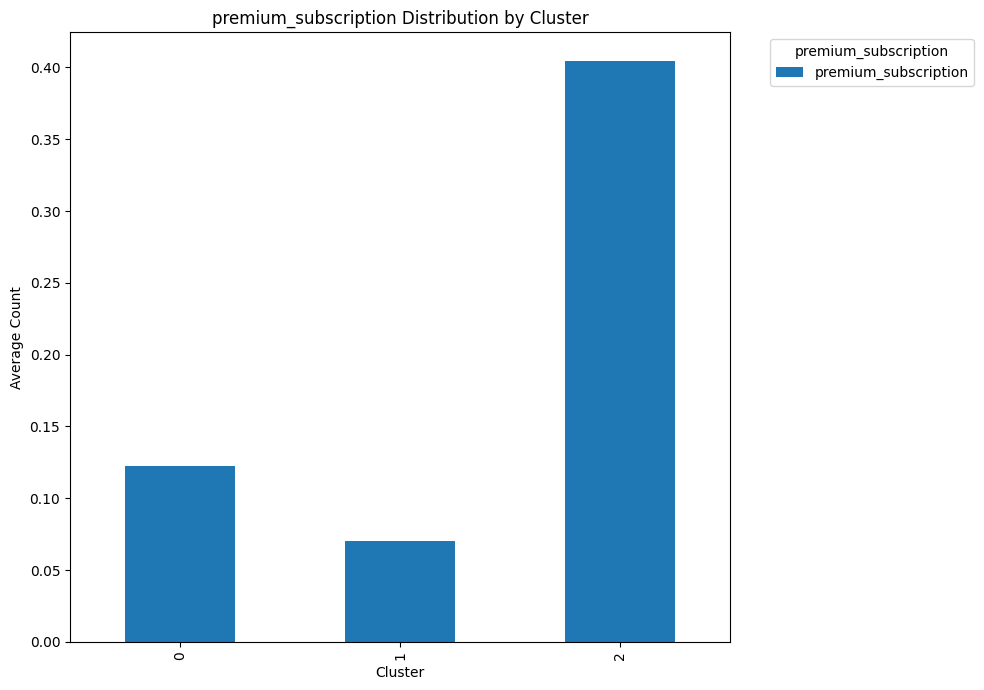

In [ ]:


# Function to plot distribution of one-hot encoded features by cluster
def plot_feature_distribution_by_cluster(df, cluster_col, feature_prefix):

    encoded_columns = [col for col in df.columns if col.startswith(feature_prefix)]

    # Aggregate the data for these columns by cluster
    feature_aggregation = df.groupby(cluster_col)[encoded_columns].mean()

    # Plot the feature distribution by cluster
    feature_aggregation.plot(kind='bar', stacked=True, figsize=(10, 7))
    plt.title(f'{feature_prefix} Distribution by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Average Count')
    plt.legend(title=feature_prefix, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# List of original feature prefixes before they were encoded
feature_prefixes = [
    'Age', 'Gender', 'spotify_usage_period', 'spotify_listening_device',
    'preffered_premium_plan', 'preferred_listening_content', 'fav_music_genre',
    'music_time_slot', 'music_Influencial_mood', 'music_lis_frequency',
    'music_expl_method', 'music_recc_rating', 'pod_lis_frequency',
    'fav_pod_genre', 'preffered_pod_format', 'pod_host_preference',
    'preffered_pod_duration', 'pod_variety_satisfaction' , 'premium_subscription'
]

# Plot distribution for each feature by cluster
for feature_prefix in feature_prefixes:
    plot_feature_distribution_by_cluster(df, 'Cluster', feature_prefix)

Text(0, 0.5, 'Proportion Willing to Pay')

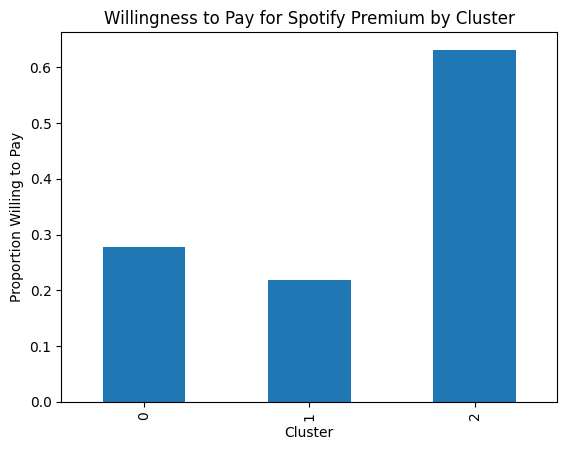

In [ ]:
# Calculate the mean of 'premium_sub_willingness' for each cluster
willingness_to_pay = df.groupby('Cluster')['premium_sub_willingness'].mean()

# Visualize willingness to pay by cluster
willingness_to_pay.plot(kind='bar')
plt.title('Willingness to Pay for Spotify Premium by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proportion Willing to Pay')

In [ ]:
def get_most_prominent_categories(df, cluster_col, feature_prefix):
    prominent_categories = {}
    for cluster in df[cluster_col].unique():
        cluster_data = df[df[cluster_col] == cluster]
        category_means = cluster_data.filter(regex=f'^{feature_prefix}').mean()
        prominent_category = category_means.idxmax()
        prominent_value = category_means.max()
        prominent_categories[cluster] = (prominent_category, prominent_value)
    return prominent_categories

most_prominent_age_group = get_most_prominent_categories(df, 'Cluster', 'Age_')

most_prominent_music_genre = get_most_prominent_categories(df, 'Cluster', 'fav_music_genre_')

most_prominent_listening_time = get_most_prominent_categories(df, 'Cluster', 'music_time_slot_')

most_prominent_listening_content = get_most_prominent_categories(df, 'Cluster', 'preferred_listening_content_')

most_prominent_listening_device = get_most_prominent_categories(df, 'Cluster', 'spotify_listening_device_')

most_prominent_listening_frequency = get_most_prominent_categories(df, 'Cluster', 'music_lis_frequency_')

most_prominent_music_expl_method = get_most_prominent_categories(df, 'Cluster', 'music_expl_method_')

most_prominent_preffered_premium_plan = get_most_prominent_categories(df, 'Cluster', 'preffered_premium_plan_')



In [ ]:
# Convert the dictionaries to a DataFrame
number_of_clusters = 3
prominent_df = pd.DataFrame({
    'Cluster': range(number_of_clusters),  # Replace with the correct number of clusters
    'Most Prominent Age Group': [most_prominent_age_group[cluster][0] for cluster in range(number_of_clusters)],
    'Most Prominent Music Genre': [most_prominent_music_genre[cluster][0] for cluster in range(number_of_clusters)],
    'Most Prominent Listening Time': [most_prominent_listening_time[cluster][0] for cluster in range(number_of_clusters)],
    'Most Prominent Listening Content' : [most_prominent_listening_content[cluster][0] for cluster in range(number_of_clusters)],
    'Most Prominent Listening Device' : [most_prominent_listening_device[cluster][0] for cluster in range(number_of_clusters)],
    'Most Prominent Listening Frequency' : [most_prominent_listening_frequency[cluster][0] for cluster in range(number_of_clusters)],
    'Most Prominent Explore Method' : [most_prominent_music_expl_method[cluster][0] for cluster in range(number_of_clusters)],
    'Most Prominent Preffered Premium Plan' : [most_prominent_preffered_premium_plan[cluster][0] for cluster in range(number_of_clusters)]
})

# Display the DataFrame
print(prominent_df)

   Cluster Most Prominent Age Group Most Prominent Music Genre  \
0        0                Age_20-35     fav_music_genre_Melody   
1        1                Age_20-35     fav_music_genre_Melody   
2        2                Age_20-35  fav_music_genre_classical   

  Most Prominent Listening Time     Most Prominent Listening Content  \
0         music_time_slot_Night    preferred_listening_content_Music   
1         music_time_slot_Night    preferred_listening_content_Music   
2     music_time_slot_Afternoon  preferred_listening_content_Podcast   

               Most Prominent Listening Device  \
0          spotify_listening_device_Smartphone   
1          spotify_listening_device_Smartphone   
2  spotify_listening_device_Computer or laptop   

    Most Prominent Listening Frequency      Most Prominent Explore Method  \
0  music_lis_frequency_While Traveling        music_expl_method_Playlists   
1     music_lis_frequency_leisure time  music_expl_method_recommendations   
2  music_lis_f

In [ ]:
premium_subscribers = df[df['premium_subscription'] == 1]
willingness_to_continue = premium_subscribers['premium_sub_willingness'].value_counts()
print(willingness_to_continue)

1    72
0    24
Name: premium_sub_willingness, dtype: int64


In [ ]:
df

,premium_sub_willingness,music_recc_rating,pod_lis_frequency,pod_variety_satisfaction,premium_subscription,Age_12-20,Age_20-35,Age_35-60,Age_6-12,Age_60+,...,preffered_pod_format_Story telling,pod_host_preference_Both,pod_host_preference_None,pod_host_preference_Well known individuals,pod_host_preference_unknown Podcasters,preffered_pod_duration_Both,preffered_pod_duration_Longer,preffered_pod_duration_None,preffered_pod_duration_Shorter,Cluster
0,1,-0.514859,2.373813,-0.532252,0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
1,1,-1.536717,1.481273,0.737340,0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
2,1,0.506999,0.588733,0.737340,0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2
3,0,0.506999,-1.196347,-0.532252,0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
4,0,0.506999,-0.303807,-0.532252,0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,1,1.528856,-0.303807,-0.532252,0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
516,1,-1.536717,-0.303807,-0.532252,0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
517,0,-0.514859,-1.196347,-0.532252,0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
518,1,-1.536717,1.481273,0.737340,1,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2


# Decision Tree Algorithm
### Findings
---
76% Accuracy on the following features: ['preffered_premium_plan_None',
 'spotify_listening_device_Computer or laptop',
 'premium_subscription',
 'pod_variety_satisfaction',
 'music_Influencial_mood_Sadness or melancholy',
 'music_lis_frequency_While Traveling',
 'pod_lis_frequency',
 'music_recc_rating',
 'music_time_slot_Morning',
 'music_lis_frequency_Study Hours, While Traveling, Workout session'].


---


80% Accuracy on all in features_column(146cols total).


---
Most likely to subscribe to spotify premium based on decision tree:
1. Spotify usage period 6mo-1yr
2. Listen to spotify on computer or laptop
3. "Other" gender
4. Premium student plan


In [ ]:
#decision tree algorithm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Assuming your DataFrame is named df
X = df.drop(['premium_sub_willingness'], axis=1)
y = df['premium_sub_willingness']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create a decision tree classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

# Display the top 10 most relevant features
print(top_features)

                                              Feature  Importance
24                        preffered_premium_plan_None    0.310313
16        spotify_listening_device_Computer or laptop    0.109401
3                                premium_subscription    0.065392
2                            pod_variety_satisfaction    0.062785
50       music_Influencial_mood_Sadness or melancholy    0.038578
83                music_lis_frequency_While Traveling    0.035781
1                                   pod_lis_frequency    0.033912
0                                   music_recc_rating    0.031670
40                            music_time_slot_Morning    0.029385
77  music_lis_frequency_Study Hours, While Traveli...    0.024742


In [ ]:
feature_columns = [col for col in df.columns if col != 'premium_sub_willingness']
feature_columns_age = ['Age_12-20', 'Age_20-35', 'Age_35-60', 'Age_6-12', 'Age_60+']
ft_col_test = [col for col in top_features['Feature']]
feat_col = ['Cluster', 'pod_lis_frequency', 'music_lis_frequency_While Traveling','music_lis_frequency_Office hours',
            'music_lis_frequency_Social gatherings ', 'music_lis_frequency_Study Hours','music_lis_frequency_Workout session', 'music_lis_frequency_leisure time']
feature_columns

['music_recc_rating',
 'pod_lis_frequency',
 'pod_variety_satisfaction',
 'premium_subscription',
 'Age_12-20',
 'Age_20-35',
 'Age_35-60',
 'Age_6-12',
 'Age_60+',
 'Gender_Female',
 'Gender_Male',
 'Gender_Others',
 'spotify_usage_period_1 year to 2 years',
 'spotify_usage_period_6 months to 1 year',
 'spotify_usage_period_Less than 6 months',
 'spotify_usage_period_More than 2 years',
 'spotify_listening_device_Computer or laptop',
 'spotify_listening_device_Smart speakers or voice assistants',
 'spotify_listening_device_Smartphone',
 'spotify_listening_device_Wearable devices',
 'spotify_listening_device_multi-device',
 'preffered_premium_plan_Duo plan- Rs 149/month',
 'preffered_premium_plan_Family Plan-Rs 179/month',
 'preffered_premium_plan_Individual Plan- Rs 119/ month',
 'preffered_premium_plan_None',
 'preffered_premium_plan_Student Plan-Rs 59/month',
 'preferred_listening_content_Music',
 'preferred_listening_content_Podcast',
 'fav_music_genre_All',
 'fav_music_genre_Class

In [ ]:
# Assuming target variable is 'premium_sub_willingness'

# Separate features (X) and target variable (y)
X = df[ft_col_test]
y = df['premium_sub_willingness']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a decision tree classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"class report: {class_report}")

Accuracy: 0.7628205128205128
class report:               precision    recall  f1-score   support

           0       0.79      0.86      0.82       100
           1       0.70      0.59      0.64        56

    accuracy                           0.76       156
   macro avg       0.75      0.72      0.73       156
weighted avg       0.76      0.76      0.76       156



In [ ]:
# Assuming target variable is 'premium_sub_willingness'

# Separate features (X) and target variable (y)
X = df[feat_col]
y = df['premium_sub_willingness']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Create a decision tree classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"class report: {class_report}")

Accuracy: 0.6730769230769231
class report:               precision    recall  f1-score   support

           0       0.68      0.84      0.75        31
           1       0.64      0.43      0.51        21

    accuracy                           0.67        52
   macro avg       0.66      0.63      0.63        52
weighted avg       0.67      0.67      0.66        52



In [ ]:
#Visualize decision tree
from sklearn import tree
import matplotlib.pyplot as plt

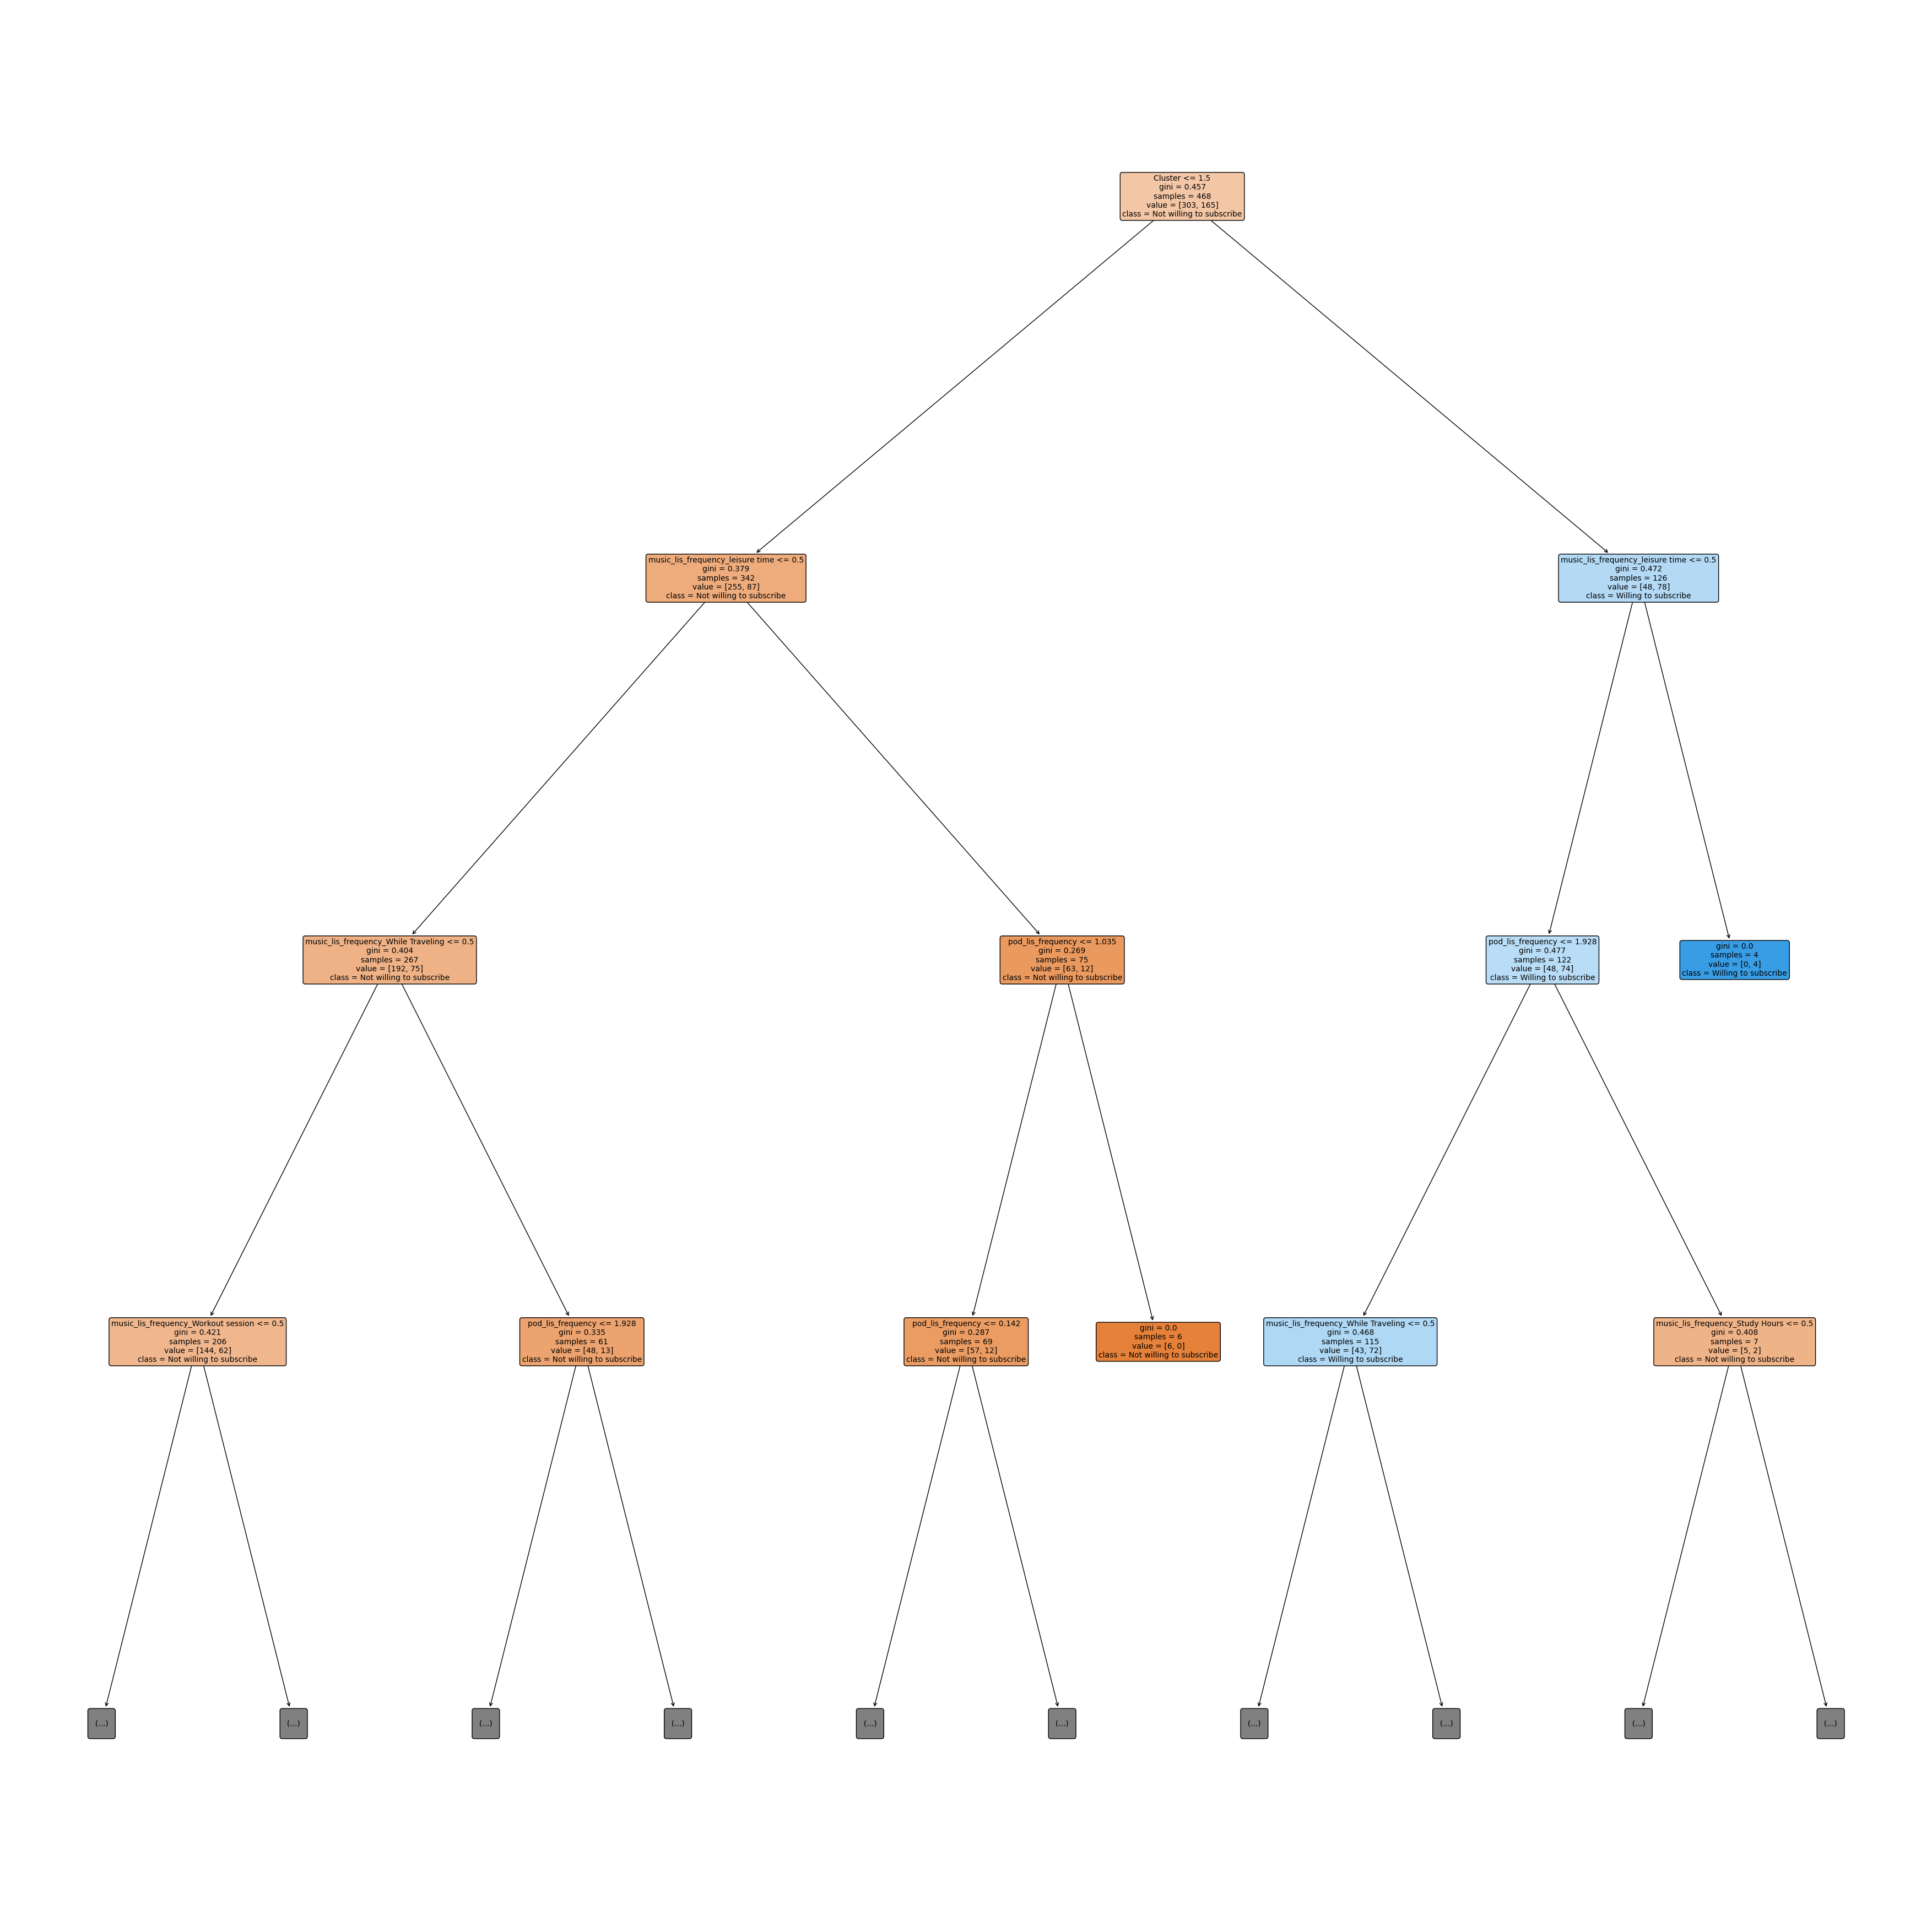

In [ ]:
# Visualize the decision tree using plt
fig, ax = plt.subplots(figsize=(45, 45))
tree.plot_tree(model, fontsize=10, feature_names=X.columns, class_names=['Not willing to subscribe', 'Willing to subscribe'], filled=True, rounded=True, ax=ax, max_depth=3)

plt.show()

In [ ]:
#by preferred listening content
feature_cols = ['pod_lis_frequency', 'fav_pod_genre_Business',
 'fav_pod_genre_Comedy',
 'fav_pod_genre_Dance and Relevant cases ',
 'fav_pod_genre_Educational ',
 'fav_pod_genre_Everything',
 'fav_pod_genre_Finance related and current affairs',
 'fav_pod_genre_Food and cooking',
 'fav_pod_genre_General knowledge ',
 'fav_pod_genre_Health and Fitness',
 'fav_pod_genre_Informative stuff',
 'fav_pod_genre_Lifestyle and Health',
 'fav_pod_genre_Murder Mystery ',
 'fav_pod_genre_None',
 'fav_pod_genre_Novels',
 'fav_pod_genre_Political, informative, topics that interests me',
 'fav_pod_genre_Self help',
 'fav_pod_genre_Spiritual and devotional',
 'fav_pod_genre_Sports',
 'fav_pod_genre_Stories ',
 'fav_pod_genre_Technology',
 'preffered_pod_format_Conversational',
 'preffered_pod_format_Educational',
 'preffered_pod_format_Interview',
 'preffered_pod_format_None',
 'preffered_pod_format_Story telling',
 'pod_host_preference_Both',
 'pod_host_preference_None',
 'pod_host_preference_Well known individuals',
 'pod_host_preference_unknown Podcasters',
 'preffered_pod_duration_Both',
 'preffered_pod_duration_Longer',
 'preffered_pod_duration_None',
 'preffered_pod_duration_Shorter']
# Separate features (X) and target variable (y)
X = df[feature_cols]
y = df['premium_sub_willingness']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Create a decision tree classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"class report: {class_report}")

Accuracy: 0.6346153846153846
class report:               precision    recall  f1-score   support

           0       0.65      0.84      0.73        31
           1       0.58      0.33      0.42        21

    accuracy                           0.63        52
   macro avg       0.62      0.59      0.58        52
weighted avg       0.62      0.63      0.61        52



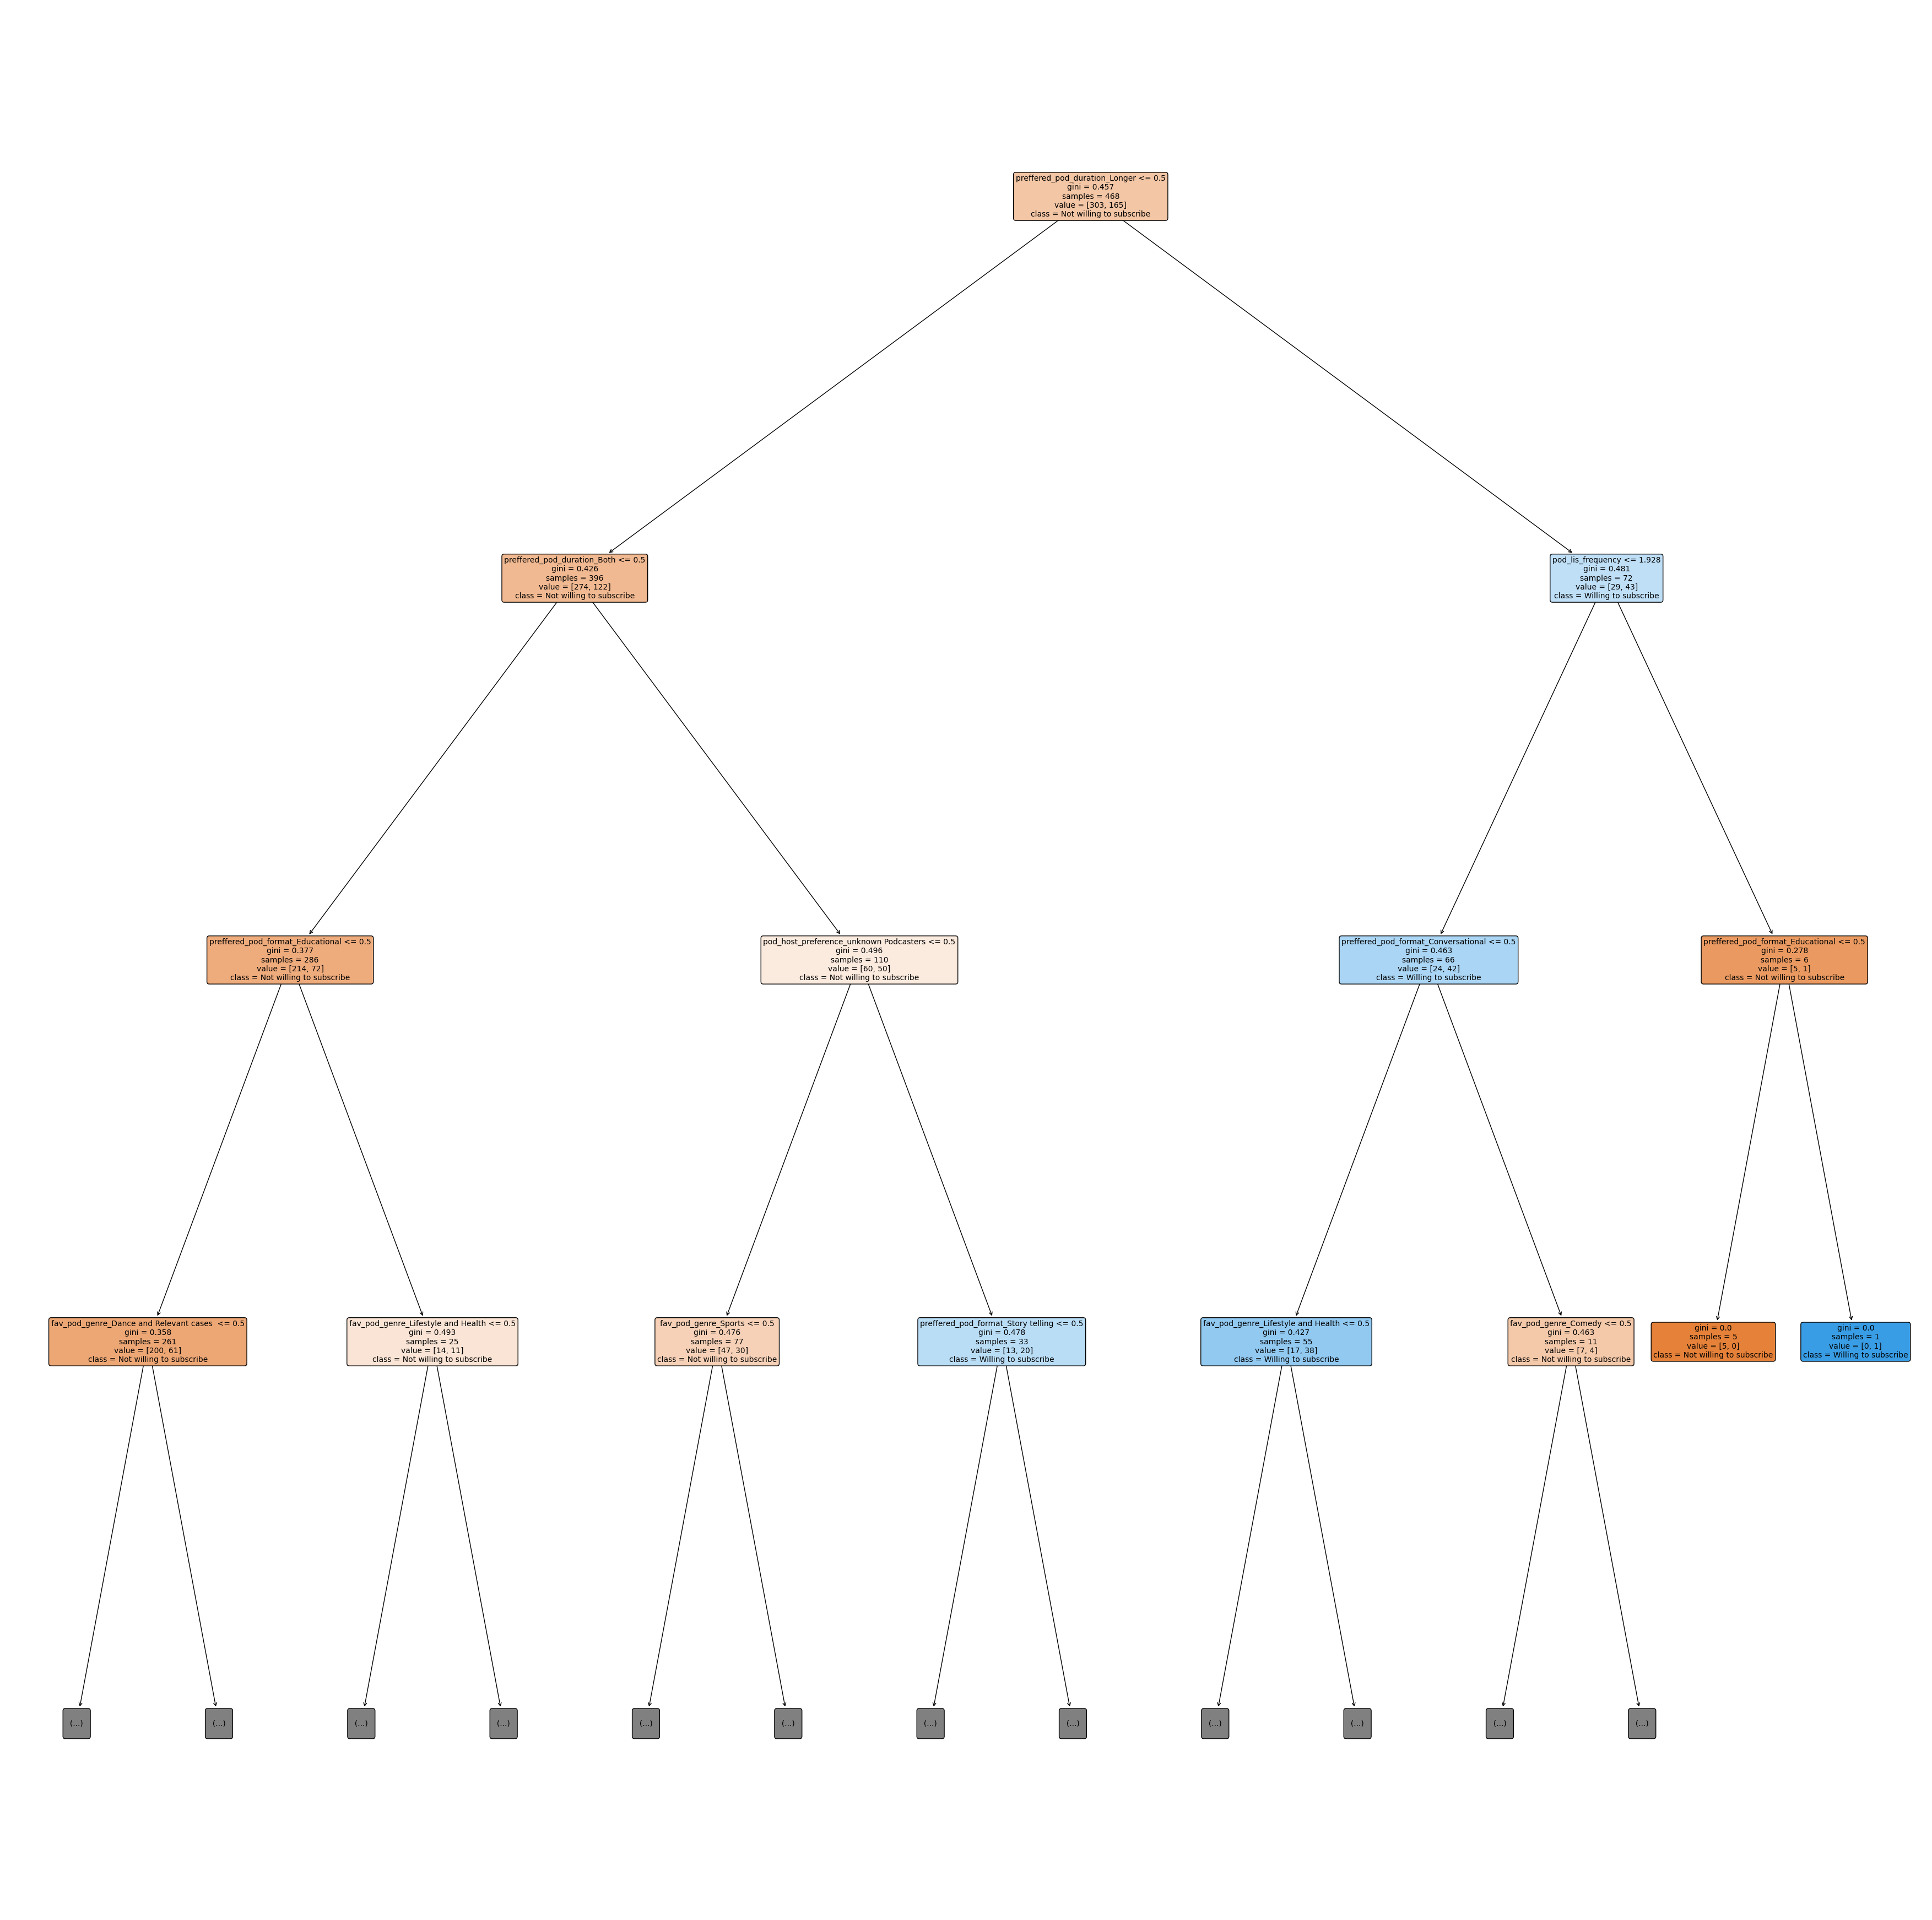

In [ ]:
# Visualize the decision tree using plt
fig, ax = plt.subplots(figsize=(45, 45))
tree.plot_tree(model, fontsize=10, feature_names=X.columns, class_names=['Not willing to subscribe', 'Willing to subscribe'], filled=True, rounded=True, ax=ax, max_depth=3)

plt.show()

In [ ]:
#looking at cluster feature along with others that might add some clarity or trends
# Assuming target variable is 'premium_sub_willingness'
# Separate features (X) and target variable (y)
X = df[feat_col]
y = df['premium_sub_willingness']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Create a decision tree classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"class report: {class_report}")

Accuracy: 0.6692307692307692
class report:               precision    recall  f1-score   support

           0       0.70      0.84      0.77       166
           1       0.57      0.36      0.44        94

    accuracy                           0.67       260
   macro avg       0.63      0.60      0.60       260
weighted avg       0.65      0.67      0.65       260



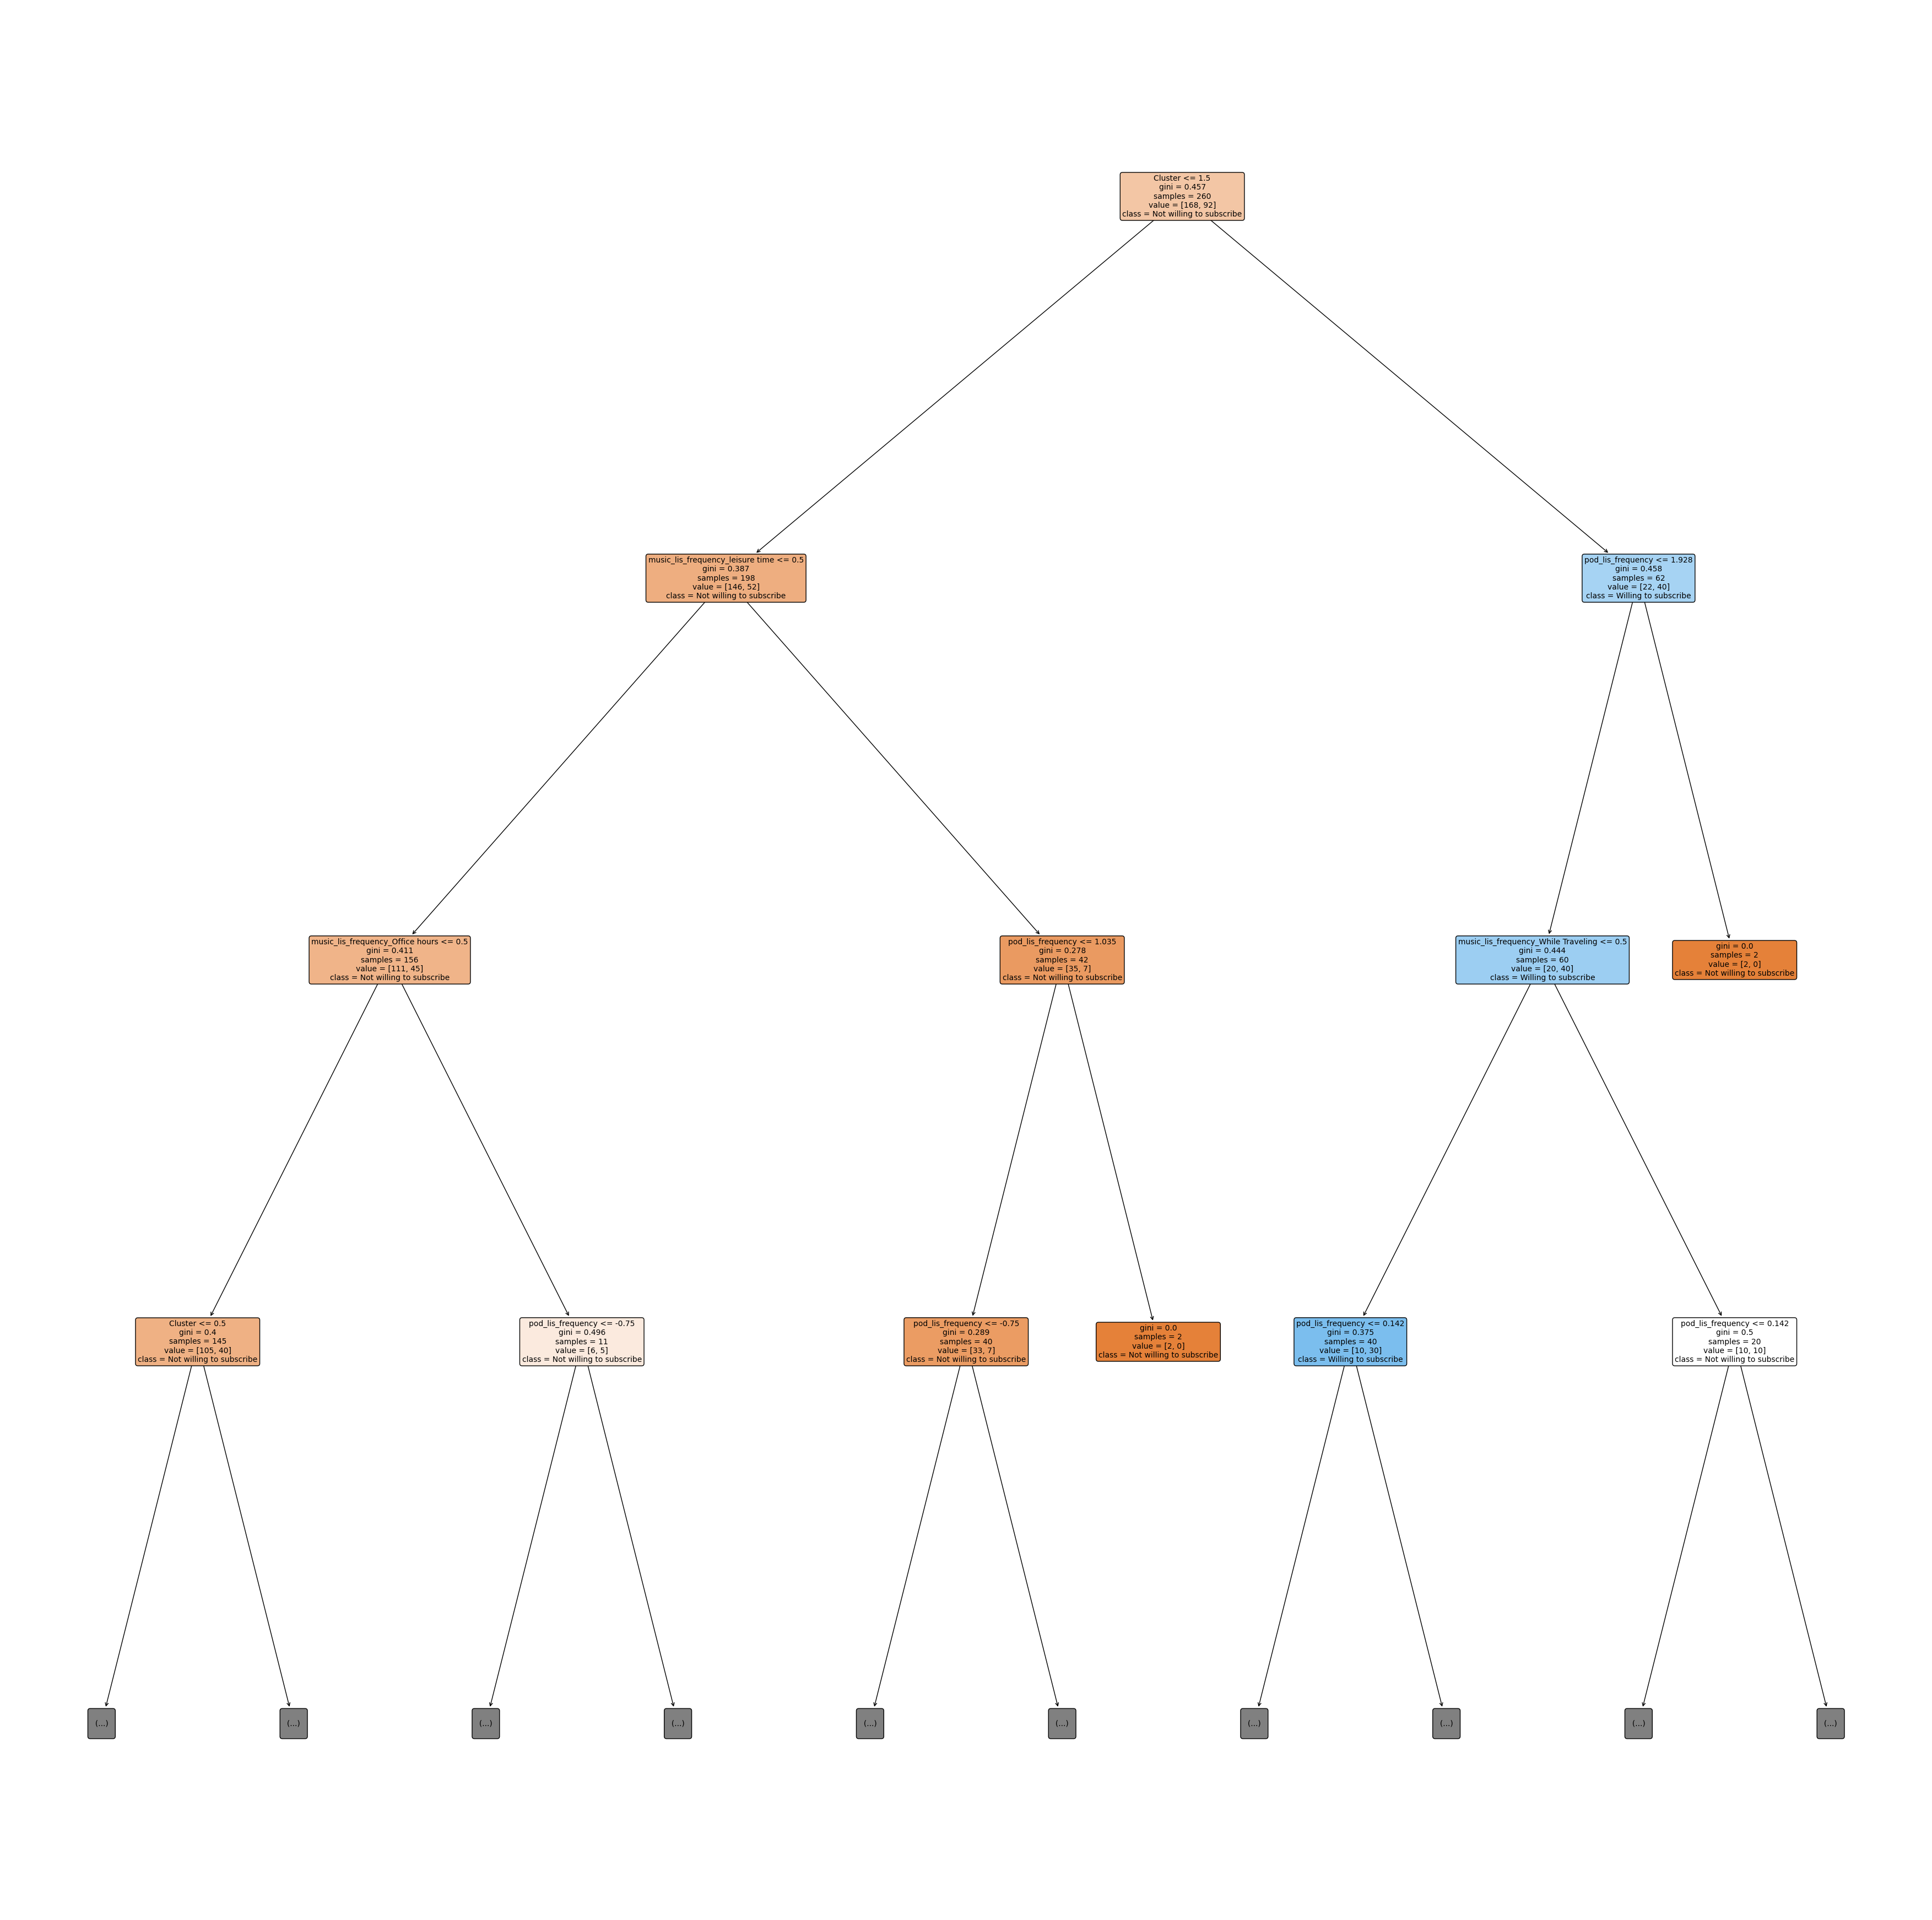

In [ ]:
# Visualize the decision tree using plt
fig, ax = plt.subplots(figsize=(45, 45))
tree.plot_tree(model, fontsize=10, feature_names=X.columns, class_names=['Not willing to subscribe', 'Willing to subscribe'], filled=True, rounded=True, ax=ax, max_depth=3)

plt.show()

In [ ]:
#looking at age feature along with others that might add some clarity or trends
# Assuming target variable is 'premium_sub_willingness'
# Separate features (X) and target variable (y)
feat = ['spotify_listening_device_Computer or laptop',
 'spotify_listening_device_Smart speakers or voice assistants',
 'spotify_listening_device_Smartphone',
 'spotify_listening_device_Wearable devices',
 'spotify_listening_device_multi-device','music_time_slot_Afternoon',
 'music_time_slot_Morning',
 'music_time_slot_Night',
 'spotify_usage_period_1 year to 2 years',
 'spotify_usage_period_6 months to 1 year',
 'spotify_usage_period_Less than 6 months',
 'spotify_usage_period_More than 2 years']
X = df[feature_columns]
y = df['premium_sub_willingness']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Create a decision tree classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"class report: {class_report}")

Accuracy: 0.8076923076923077
class report:               precision    recall  f1-score   support

           0       0.82      0.87      0.84        31
           1       0.79      0.71      0.75        21

    accuracy                           0.81        52
   macro avg       0.80      0.79      0.80        52
weighted avg       0.81      0.81      0.81        52



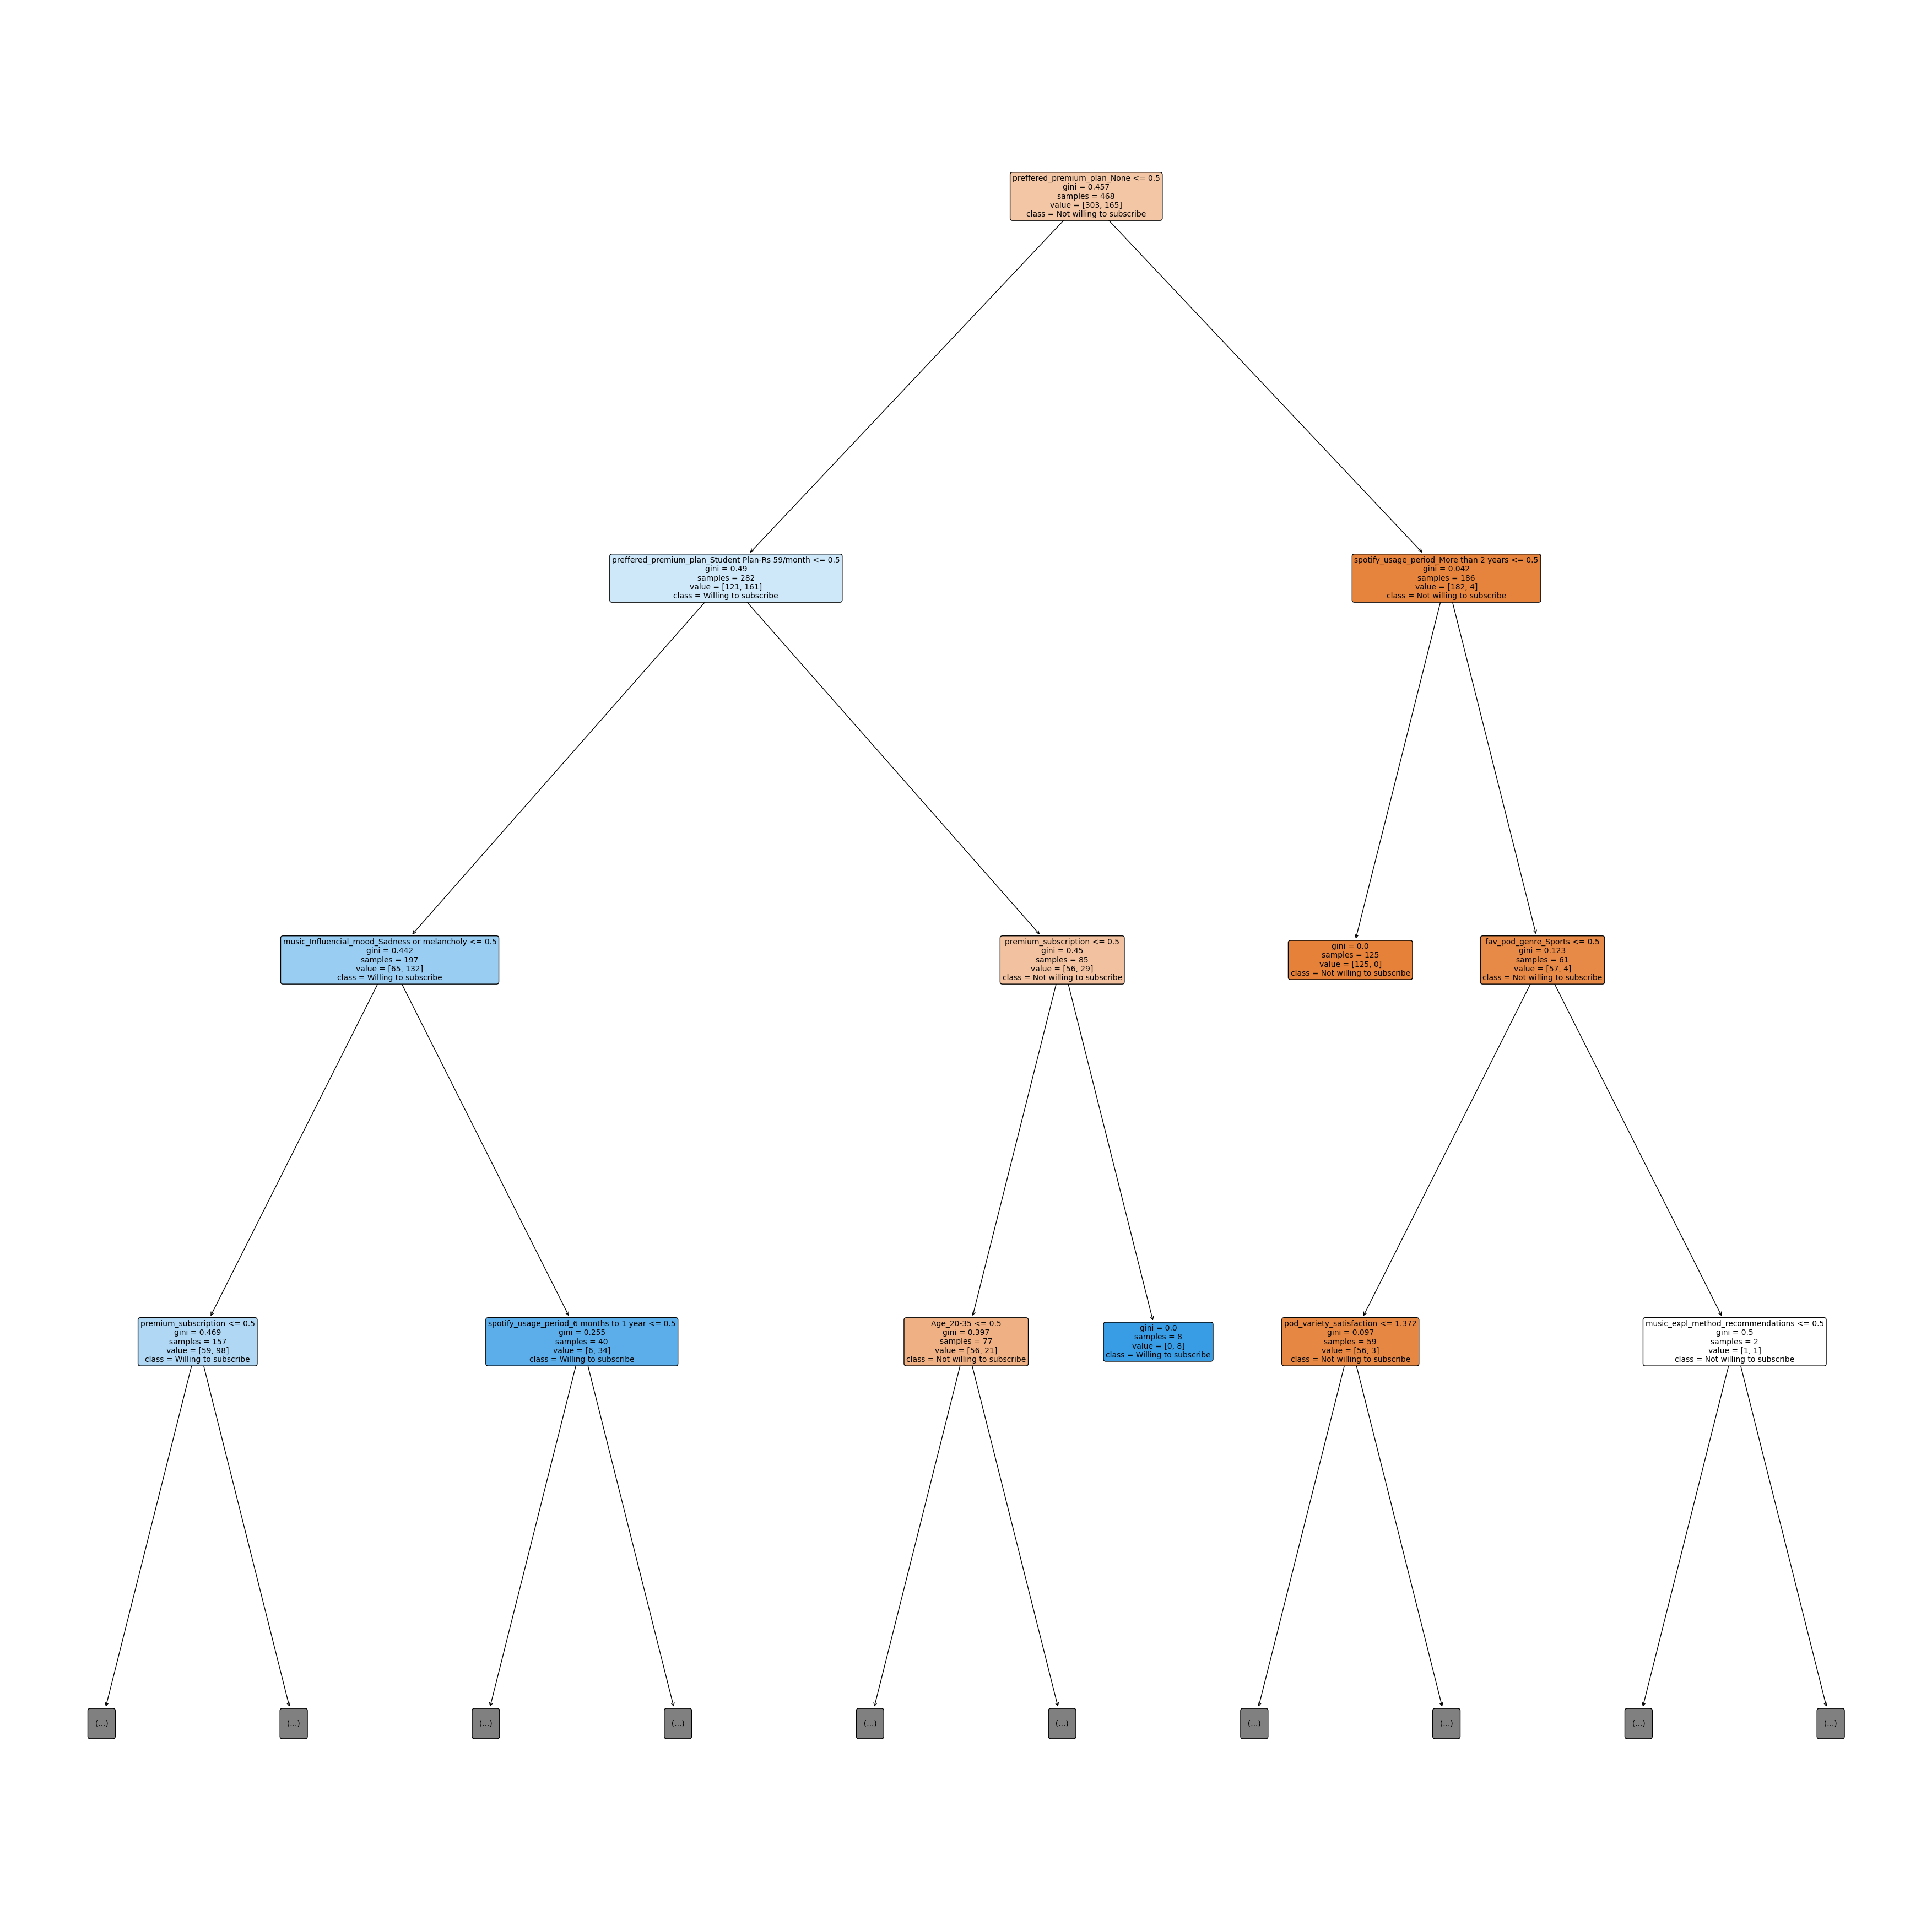

In [ ]:
# Visualize the decision tree using plt
fig, ax = plt.subplots(figsize=(45, 45))
tree.plot_tree(model, fontsize=10, feature_names=X.columns, class_names=['Not willing to subscribe', 'Willing to subscribe'], filled=True, rounded=True, ax=ax, max_depth=3)

plt.show()